## Exploratory Data Analysis

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Churn (1).xlsx")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [4]:
df.head()

Unnamed: 0 state      area.code  account.length voice.plan  voice.messages  \
0           1    KS  area_code_415             128        yes              25   
1           2    OH  area_code_415             107        yes              26   
2           3    NJ  area_code_415             137         no               0   
3           4    OH  area_code_408              84         no               0   
4           5    OK  area_code_415              75         no               0   

  intl.plan  intl.mins  intl.calls  intl.charge  ...  day.calls  day.charge  \
0        no       10.0           3         2.70  ...        110       45.07   
1        no       13.7           3         3.70  ...        123       27.47   
2        no       12.2           5         3.29  ...        114       41.38   
3       yes        6.6           7         1.78  ...         71        50.9   
4       yes       10.1           3         2.73  ...        113       28.34   

  eve.mins eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0    197.4        99       16.78       244.7           91         11.01   
1    195.5       103       16.62       254.4          103         11.45   
2    121.2       110       10.30       162.6          104          7.32   
3     61.9        88        5.26       196.9           89          8.86   
4    148.3       122       12.61       186.9          121          8.41   

   customer.calls  churn  
0               1     no  
1               1     no  
2               0     no  
3               2     no  
4               3     no  

[5 rows x 21 columns]

In [5]:
df.isnull().sum()

Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [6]:
df.drop("Unnamed: 0", axis=1, inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
# Correct data types
# Convert object columns that should be numeric
columns_to_convert = ['day.charge', 'eve.mins']
for col in columns_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
# Verify the column is dropped
print(df.head())
print(df.columns)

  state      area.code  account.length voice.plan  voice.messages intl.plan  \
0    KS  area_code_415             128        yes              25        no   
1    OH  area_code_415             107        yes              26        no   
2    NJ  area_code_415             137         no               0        no   
3    OH  area_code_408              84         no               0       yes   
4    OK  area_code_415              75         no               0       yes   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls  day.charge  \
0       10.0           3         2.70     265.1        110       45.07   
1       13.7           3         3.70     161.6        123       27.47   
2       12.2           5         3.29     243.4        114       41.38   
3        6.6           7         1.78     299.4         71       50.90   
4       10.1           3         2.73     166.7        113       28.34   

   eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area.code       5000 non-null   object 
 2   account.length  5000 non-null   int64  
 3   voice.plan      5000 non-null   object 
 4   voice.messages  5000 non-null   int64  
 5   intl.plan       5000 non-null   object 
 6   intl.mins       5000 non-null   float64
 7   intl.calls      5000 non-null   int64  
 8   intl.charge     5000 non-null   float64
 9   day.mins        5000 non-null   float64
 10  day.calls       5000 non-null   int64  
 11  day.charge      4993 non-null   float64
 12  eve.mins        4976 non-null   float64
 13  eve.calls       5000 non-null   int64  
 14  eve.charge      5000 non-null   float64
 15  night.mins      5000 non-null   float64
 16  night.calls     5000 non-null   int64  
 17  night.charge    5000 non-null   f

In [11]:
df.isnull().sum()

state              0
area.code          0
account.length     0
voice.plan         0
voice.messages     0
intl.plan          0
intl.mins          0
intl.calls         0
intl.charge        0
day.mins           0
day.calls          0
day.charge         7
eve.mins          24
eve.calls          0
eve.charge         0
night.mins         0
night.calls        0
night.charge       0
customer.calls     0
churn              0
dtype: int64

In [12]:
# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify that there are no missing values remaining
print("\nMissing values handled. Any remaining?")
print(df.isnull().sum())


Missing values handled. Any remaining?
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [13]:
df["voice.plan"].value_counts()


voice.plan
no     3677
yes    1323
Name: count, dtype: int64

##### The majority of customers (73.5%) do not have a voice plan, while only 26.5% have opted for it. This indicates that most customers may not find value in the voice plan or prefer other services.

In [14]:
df["intl.plan"].value_counts()

intl.plan
no     4527
yes     473
Name: count, dtype: int64

##### A significant majority of customers (90.5%) do not have an international plan, while only 9.5% have opted for it. This suggests that international calling may not be a primary need for most customers.

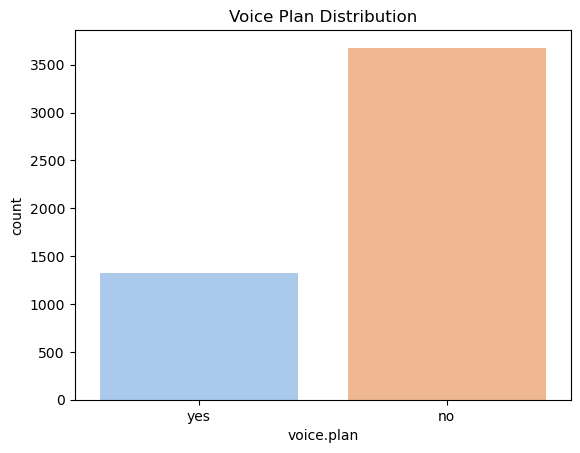

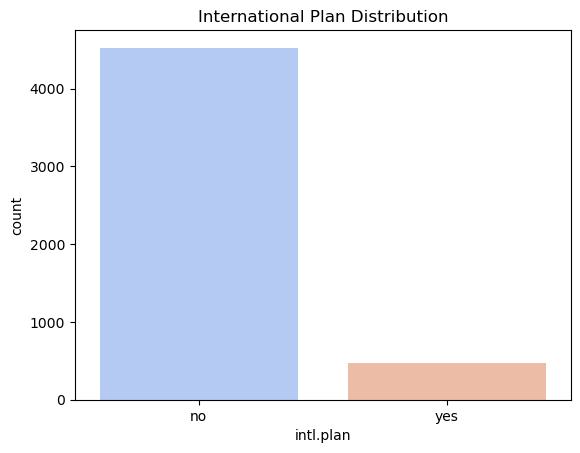

In [15]:
# Voice Plan Distribution
sns.countplot(data=df, x='voice.plan', palette='pastel')
plt.title("Voice Plan Distribution")
plt.show()

# International Plan Distribution
sns.countplot(data=df, x='intl.plan', palette='coolwarm')
plt.title("International Plan Distribution")
plt.show()


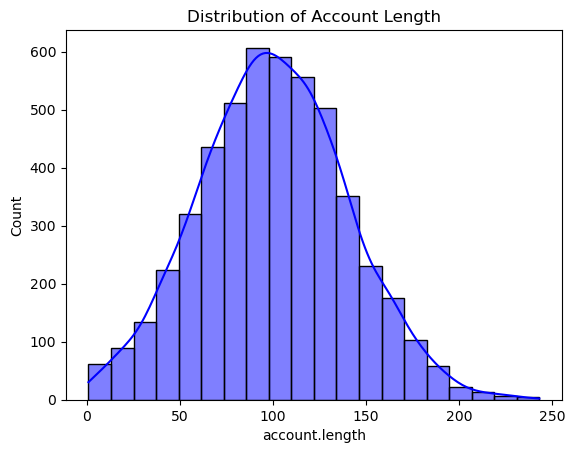

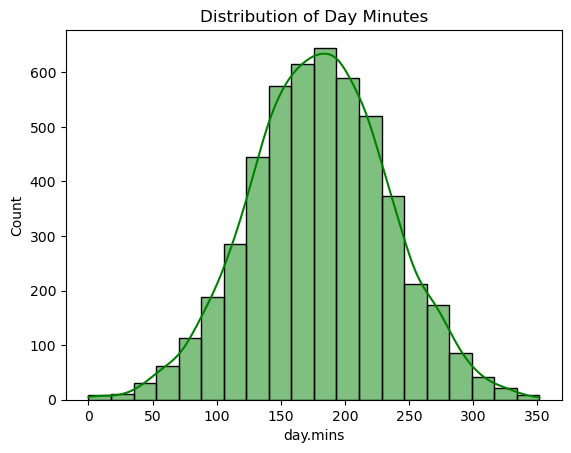

In [16]:
# Distribution of Account Length
sns.histplot(df['account.length'], kde=True, color='blue', bins=20)
plt.title("Distribution of Account Length")
plt.show()

# Distribution of Day Minutes
sns.histplot(df['day.mins'], kde=True, color='green', bins=20)
plt.title("Distribution of Day Minutes")
plt.show()


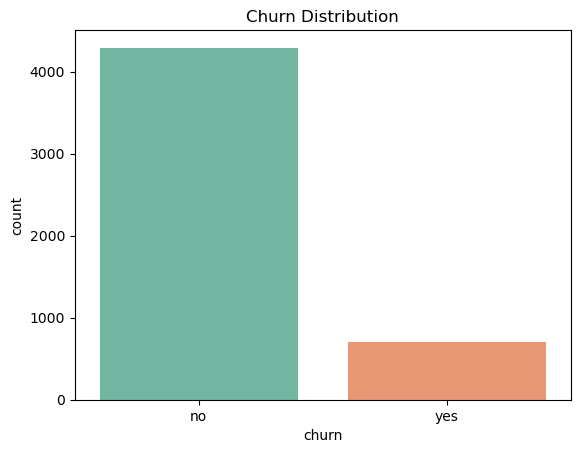

In [17]:
# Churn distribution
sns.countplot(data=df, x='churn', palette='Set2')
plt.title("Churn Distribution")
plt.show()


In [18]:
df.describe().T

count        mean        std  min     25%      50%     75%  \
account.length  5000.0  100.258600  39.694560  1.0   73.00  100.000  127.00   
voice.messages  5000.0    7.755200  13.546393  0.0    0.00    0.000   17.00   
intl.mins       5000.0   10.261780   2.761396  0.0    8.50   10.300   12.00   
intl.calls      5000.0    4.435200   2.456788  0.0    3.00    4.000    6.00   
intl.charge     5000.0    2.771196   0.745514  0.0    2.30    2.780    3.24   
day.mins        5000.0  180.288900  53.894699  0.0  143.70  180.100  216.20   
day.calls       5000.0  100.029400  19.831197  0.0   87.00  100.000  113.00   
day.charge      5000.0   30.653501   9.159936  0.0   24.43   30.625   36.75   
eve.mins        5000.0  200.580326  50.433135  0.0  166.60  200.800  233.90   
eve.calls       5000.0  100.191000  19.826496  0.0   87.00  100.000  114.00   
eve.charge      5000.0   17.054322   4.296843  0.0   14.14   17.090   19.90   
night.mins      5000.0  200.391620  50.527789  0.0  166.90  200.400  234.70   
night.calls     5000.0   99.919200  19.958686  0.0   87.00  100.000  113.00   
night.charge    5000.0    9.017732   2.273763  0.0    7.51    9.020   10.56   
customer.calls  5000.0    1.570400   1.306363  0.0    1.00    1.000    2.00   

                   max  
account.length  243.00  
voice.messages   52.00  
intl.mins        20.00  
intl.calls       20.00  
intl.charge       5.40  
day.mins        351.50  
day.calls       165.00  
day.charge       59.76  
eve.mins        363.70  
eve.calls       170.00  
eve.charge       30.91  
night.mins      395.00  
night.calls     175.00  
night.charge     17.77  
customer.calls    9.00

In [19]:
skewness = df.skew(numeric_only=True)
skewness

account.length    0.109291
voice.messages    1.350493
intl.mins        -0.209966
intl.calls        1.360692
intl.charge      -0.210286
day.mins         -0.011731
day.calls        -0.084891
day.charge       -0.012604
eve.mins         -0.012743
eve.calls        -0.020175
eve.charge       -0.010990
night.mins        0.019325
night.calls       0.002133
night.charge      0.019287
customer.calls    1.042462
dtype: float64

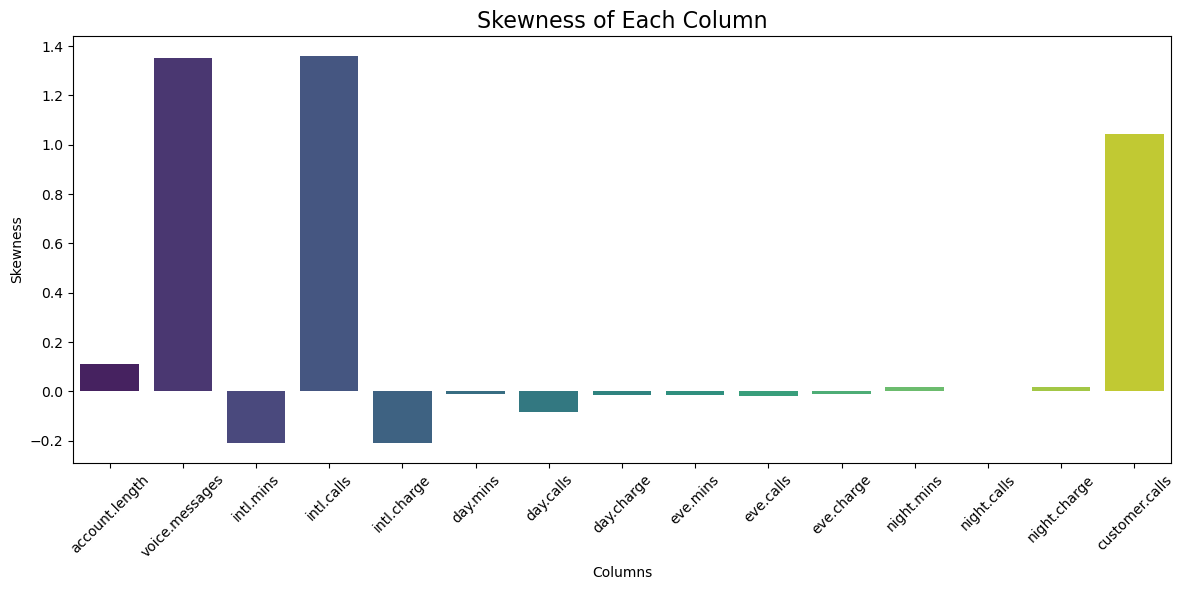

In [20]:
# Plot skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness.values, palette='viridis')
plt.title('Skewness of Each Column', fontsize=16)
plt.ylabel('Skewness')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation
#### Skewness Plot: This plot shows the skewness value for each column, indicating the asymmetry of the distribution. Positive values suggest right-skewed distributions, while negative values suggest left-skewed distributions.

In [21]:
kurt = df.kurt(numeric_only=True)
kurt

account.length   -0.101621
voice.messages    0.199127
intl.mins         0.655317
intl.calls        3.268184
intl.charge       0.655989
day.mins         -0.021294
day.calls         0.178568
day.charge       -0.018714
eve.mins          0.066450
eve.calls         0.117363
eve.charge        0.051289
night.mins        0.082359
night.calls       0.144438
night.charge      0.082378
customer.calls    1.481096
dtype: float64

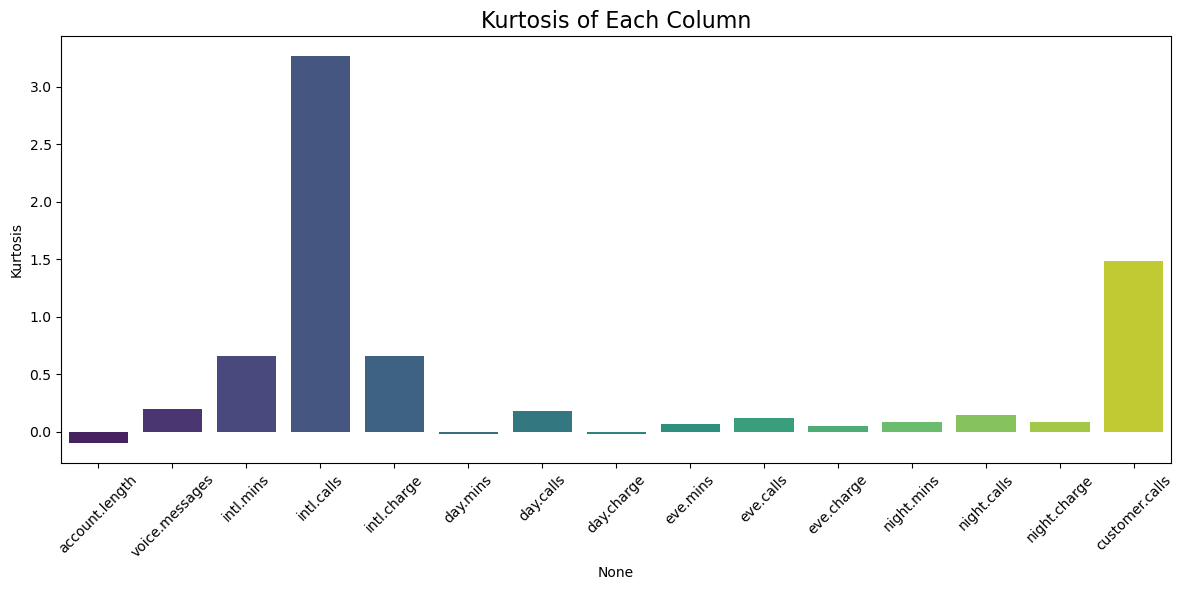

In [22]:
# Plot kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x=kurt.index, y=kurt.values, palette='viridis')
plt.title('Kurtosis of Each Column', fontsize=16)
plt.ylabel('Kurtosis')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explanation
#### Kurtosis Plot: This plot shows the kurtosis value for each column, indicating the "tailedness" of the distribution. Positive values indicate heavier tails (leptokurtic), while negative values indicate lighter tails (platykurtic).

<Axes: ylabel='Count'>

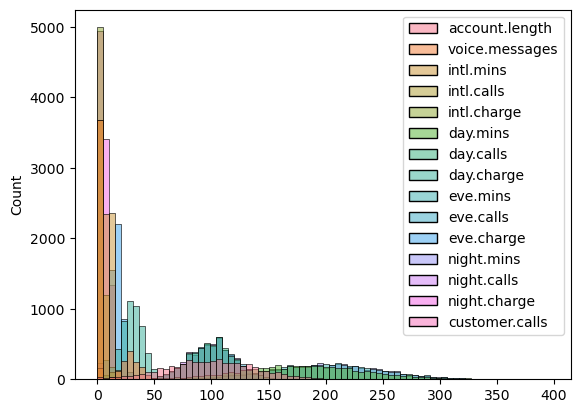

In [23]:
sns.histplot(df)

### Explanation
#### Histograms are essential for understanding the distribution, central tendency, and variability of data. Identifies Patterns i.e. reveals the shape of the data distribution, such as normal, skewed, or multimodal distributions.

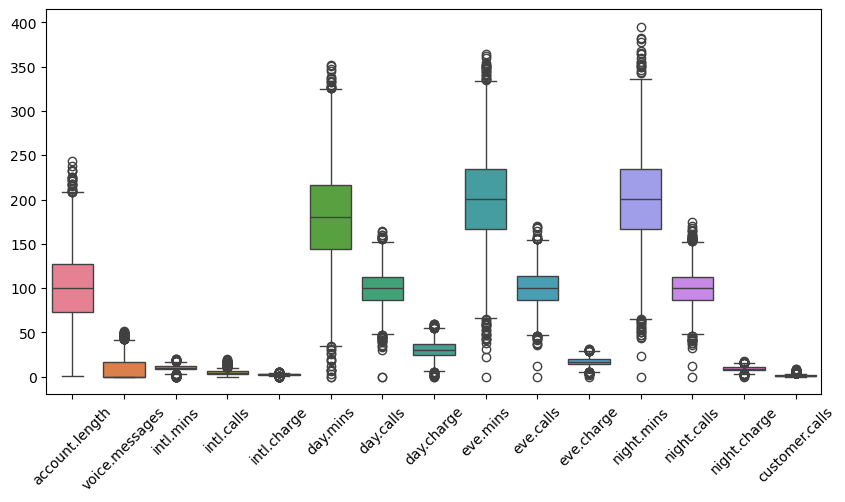

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

### Explanation
#### Boxplots: Visualize the distribution of each column and identify outliers. Points outside the whiskers are considered outliers.

In [25]:
# Assuming `dF` is your DataFrame
numeric_cols = df.select_dtypes(include=[np.number])  # Select numeric columns

# Calculate Q1, Q3, and IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using IQR method
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

# Count outliers per column
outlier_counts = outliers.sum(axis=0)  # Number of outliers per column
print(outlier_counts)

account.length     24
voice.messages     60
intl.mins          72
intl.calls        118
intl.charge        72
day.mins           34
day.calls          35
day.charge         34
eve.mins           45
eve.calls          27
eve.charge         42
night.mins         39
night.calls        43
night.charge       39
customer.calls    399
dtype: int64


In [26]:
# Calculate Q1, Q3, and IQR for numerical columns
numeric_cols = df.select_dtypes(include=[np.number])  # Select numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify rows to keep (rows without outliers)
rows_before = df.shape[0]
df = df[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]  # Filter rows
rows_after = df.shape[0]

# Calculate and display the number of rows dropped
rows_dropped = rows_before - rows_after
print(f"Number of rows before removing outliers: {rows_before}")
print(f"Number of rows after removing outliers: {rows_after}")
print(f"Number of rows dropped: {rows_dropped}")


Number of rows before removing outliers: 5000
Number of rows after removing outliers: 4158
Number of rows dropped: 842



Univariate Analysis - Categorical Features:


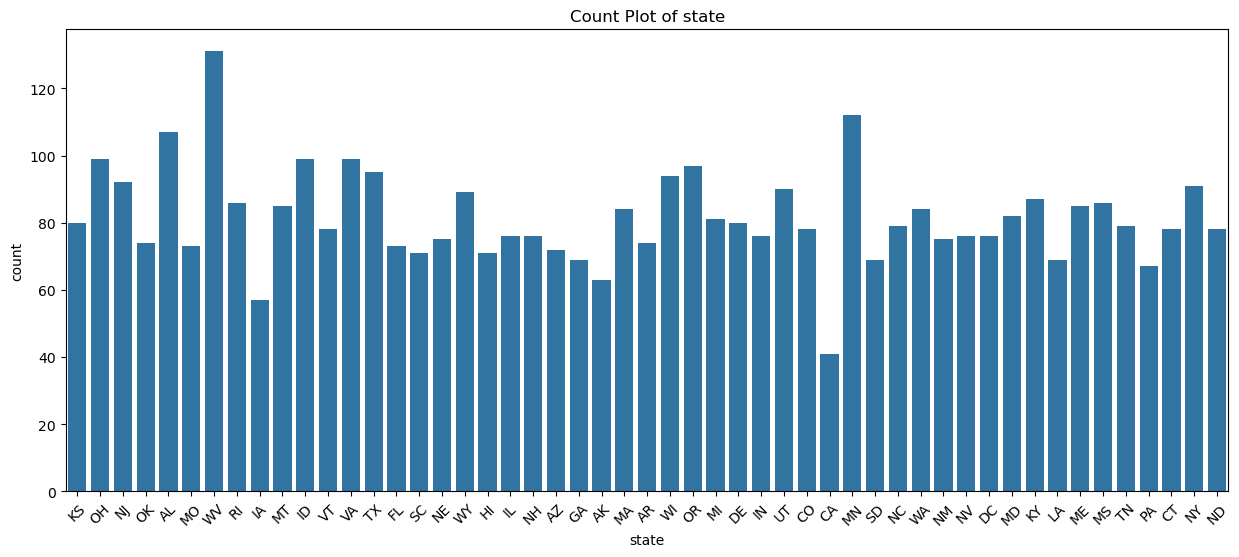

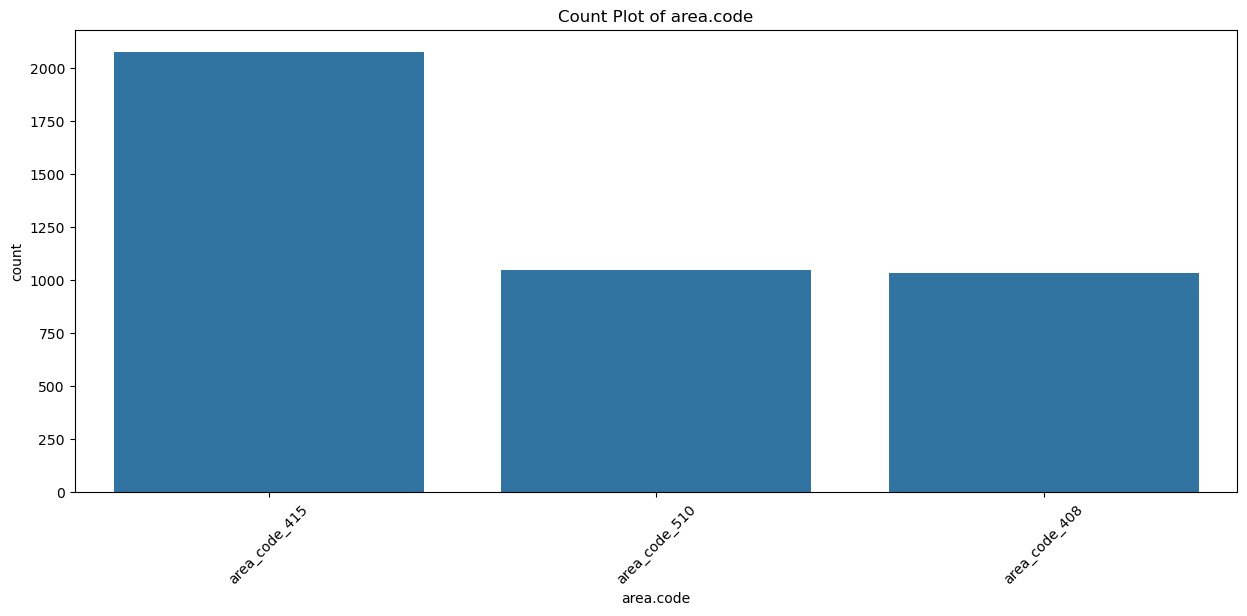

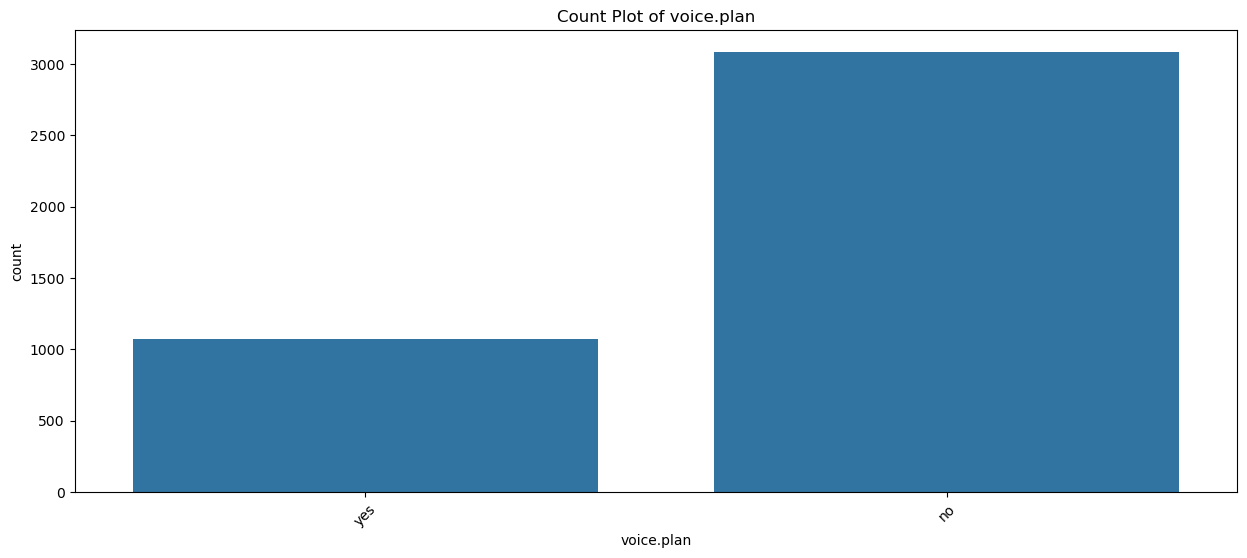

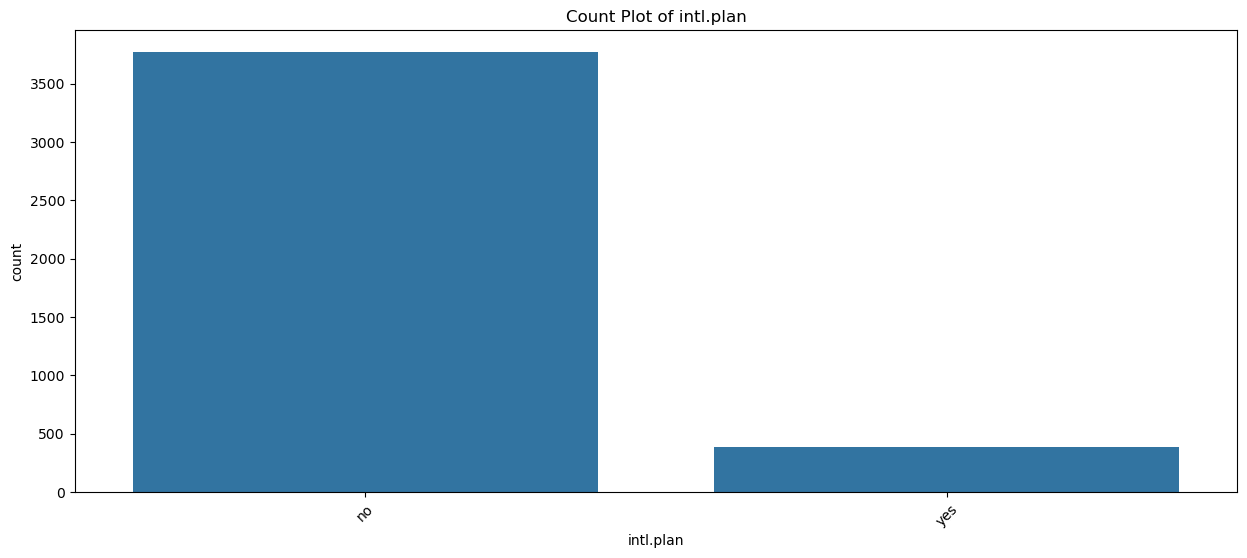

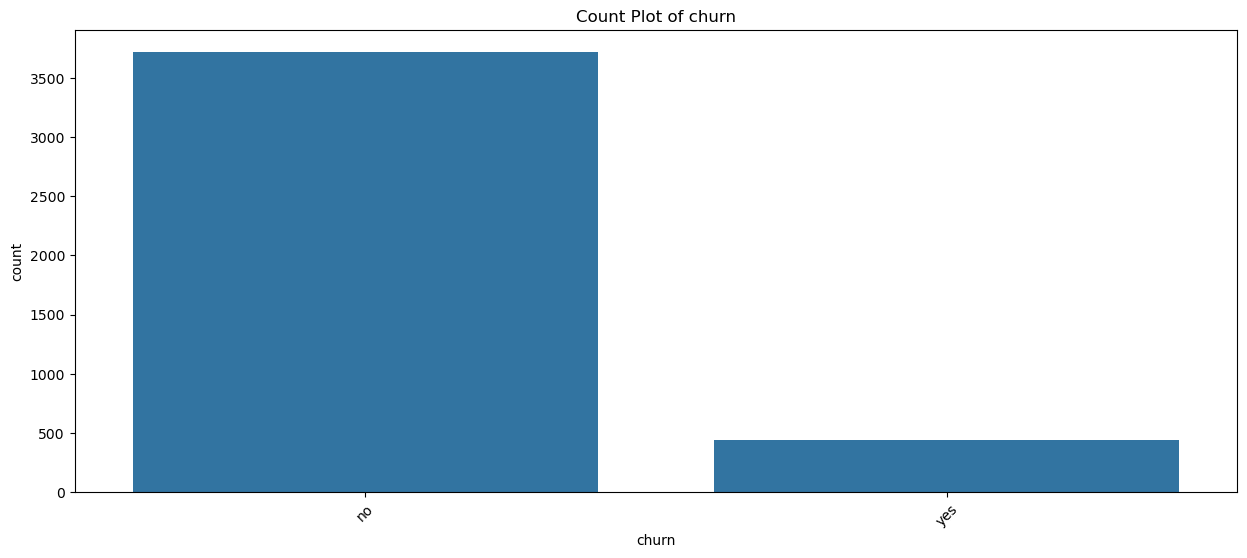

In [27]:
print("\nUnivariate Analysis - Categorical Features:")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

## Data Preprocessing

In [28]:
df.isnull().sum()

state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64

In [29]:
# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Verify that there are no missing values remaining
print("\nMissing values handled. Any remaining?")
print(df.isnull().sum())


Missing values handled. Any remaining?
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_columns}")

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])  # Direct modification

# Handle missing values (Imputation)
# Impute numerical columns with 'mean' strategy
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])  # Correct assignment

# Verify the changes
print(df.head())
print(f"Missing values after imputation: \n{df.isna().sum()}")

Categorical columns: Index(['state', 'area.code', 'voice.plan', 'intl.plan', 'churn'], dtype='object')
   state  area.code  account.length  voice.plan  voice.messages  intl.plan  \
0     16          1           128.0           1            25.0          0   
1     35          1           107.0           1            26.0          0   
2     31          1           137.0           0             0.0          0   
4     36          1            75.0           0             0.0          1   
5      1          2           118.0           0             0.0          1   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls  day.charge  \
0       10.0         3.0         2.70     265.1      110.0       45.07   
1       13.7         3.0         3.70     161.6      123.0       27.47   
2       12.2         5.0         3.29     243.4      114.0       41.38   
4       10.1         3.0         2.73     166.7      113.0       28.34   
5        6.3         6.0         1.70     223.4       98.0

## Univariate Analysis

In [31]:
# Defining a function for univariate analysis
def univariate_analysis(df, column):
    print(f"Analyzing column: {column}\n")

    # Summary statistics
    print(df[column].describe())

    # Skewness and Kurtosis
    skewness = df[column].skew()
    kurtosis = df[column].kurt()

    # Histogram with KDE
    plt.figure(figsize=(14, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {column} with KDE')
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print(f"Skewness: {skewness}")
    print(f"Kurtosis: {kurtosis}\n")

    # Boxplot
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

    # Check for outliers using IQR method
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"Number of Outliers detected: {len(outliers)}\n")

Analyzing column: account.length

count    4158.000000
mean       99.551708
std        39.195833
min         1.000000
25%        73.000000
50%       100.000000
75%       126.000000
max       205.000000
Name: account.length, dtype: float64


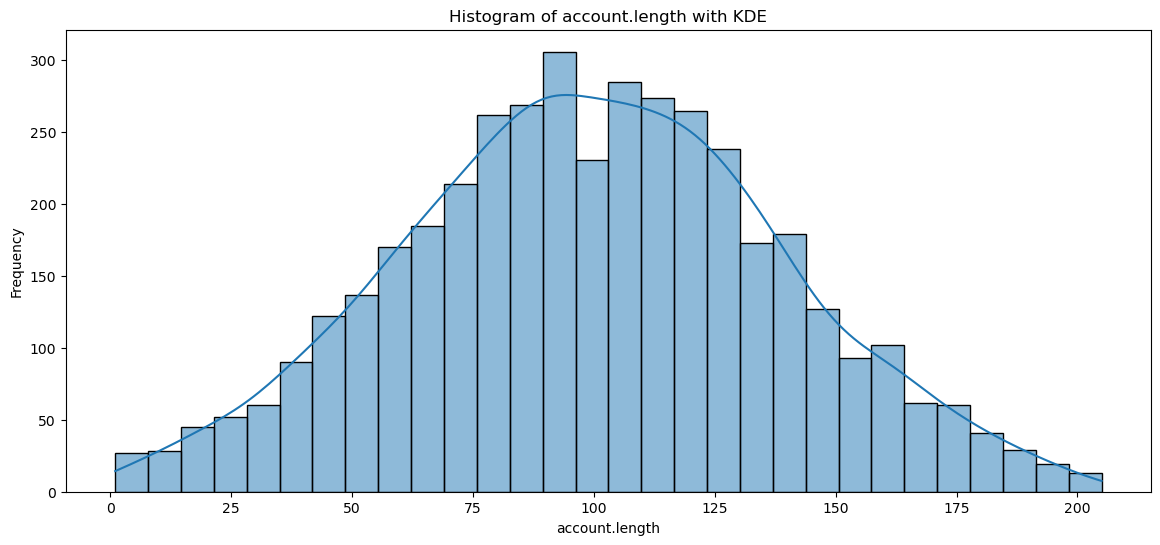

Skewness: 0.01935577879589722
Kurtosis: -0.3122640208983163



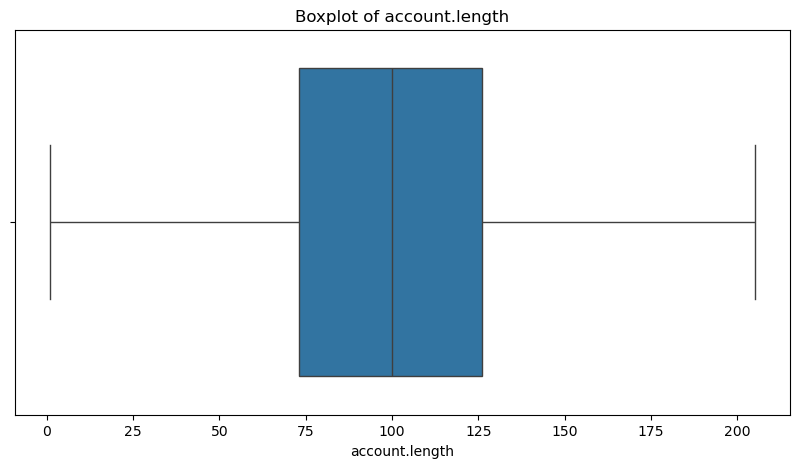

Number of Outliers detected: 0



In [32]:
univariate_analysis(df, 'account.length')

Analyzing column: voice.messages

count    4158.000000
mean        7.370611
std        13.015931
min         0.000000
25%         0.000000
50%         0.000000
75%        15.000000
max        42.000000
Name: voice.messages, dtype: float64


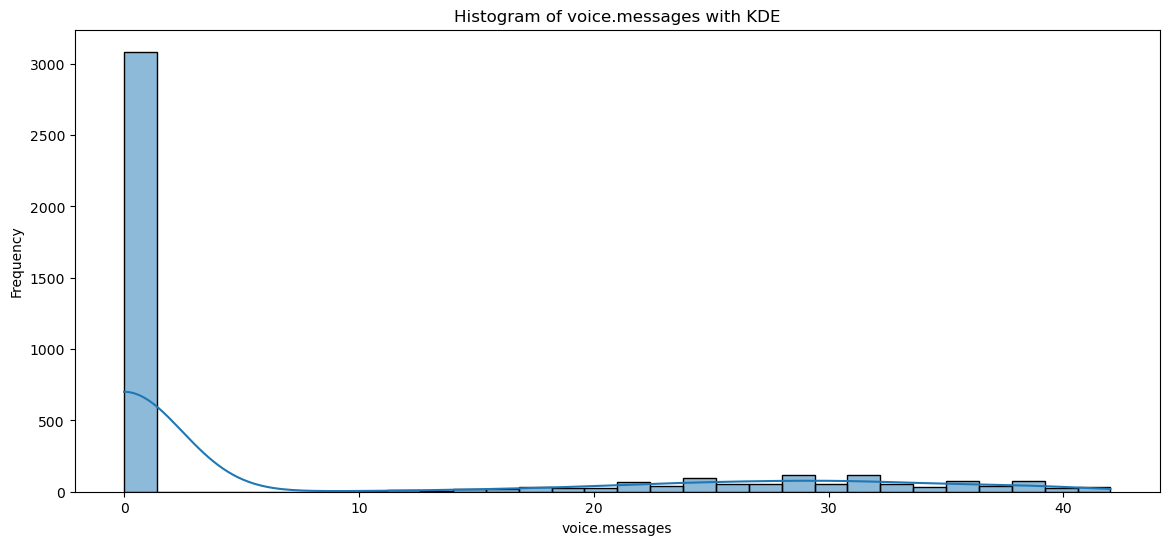

Skewness: 1.3477487772249952
Kurtosis: 0.11324500466922993



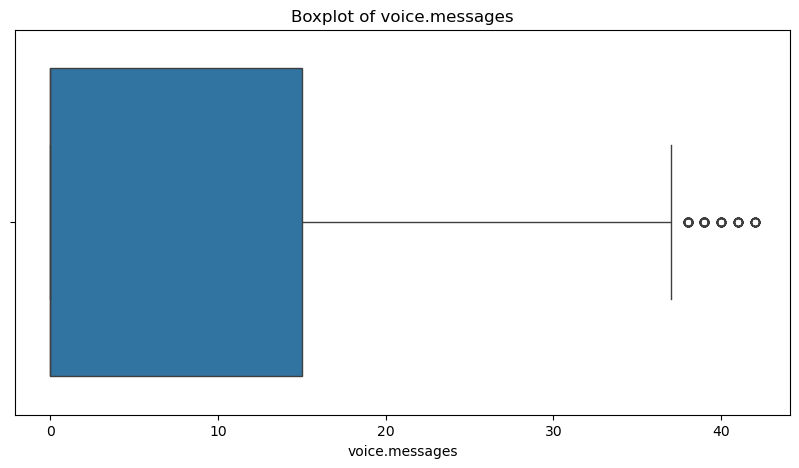

Number of Outliers detected: 130



In [33]:
univariate_analysis(df,'voice.messages')

Analyzing column: intl.mins

count    4158.000000
mean       10.313877
std         2.567917
min         3.300000
25%         8.600000
50%        10.400000
75%        12.000000
max        17.200000
Name: intl.mins, dtype: float64


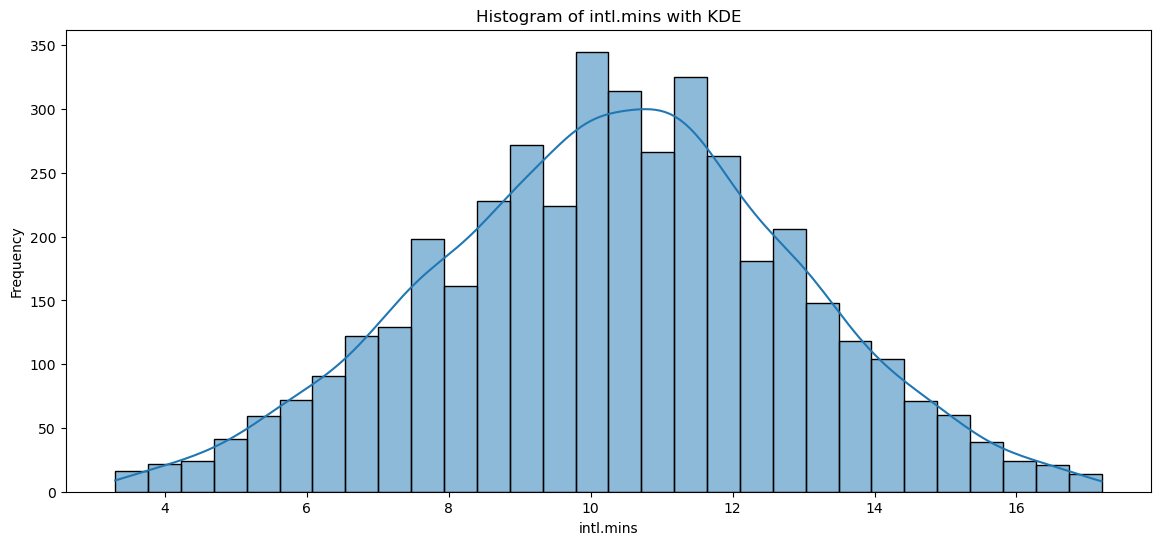

Skewness: -0.06576428706092736
Kurtosis: -0.2436590086588839



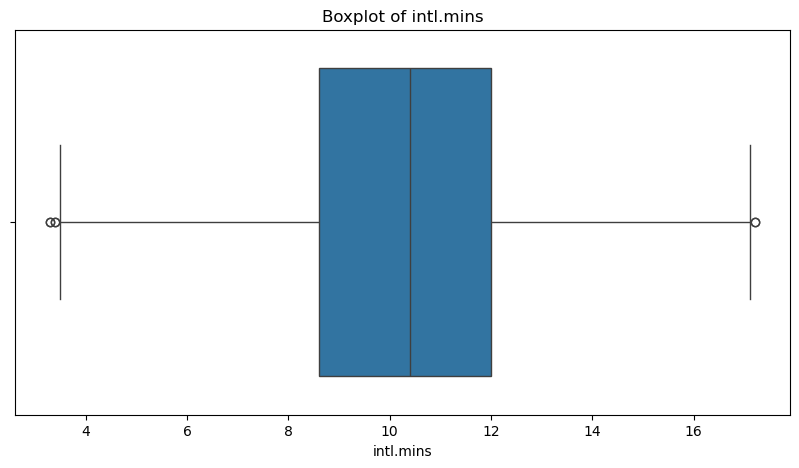

Number of Outliers detected: 6



In [34]:
univariate_analysis(df,'intl.mins')

Analyzing column: intl.calls

count    4158.000000
mean        4.267436
std         2.066876
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        10.000000
Name: intl.calls, dtype: float64


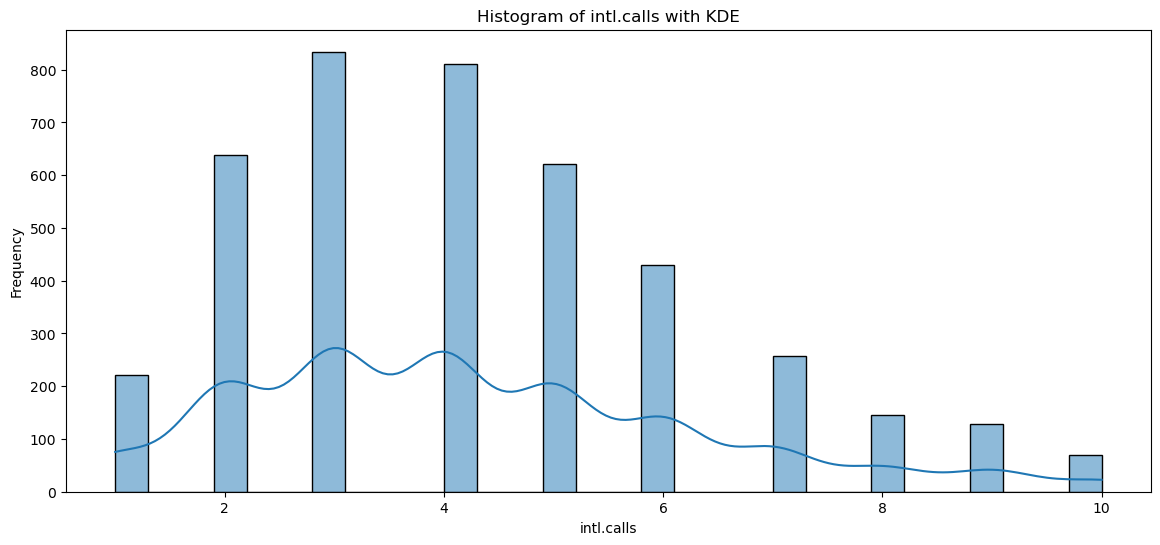

Skewness: 0.6799259630040128
Kurtosis: 0.029418254266064814



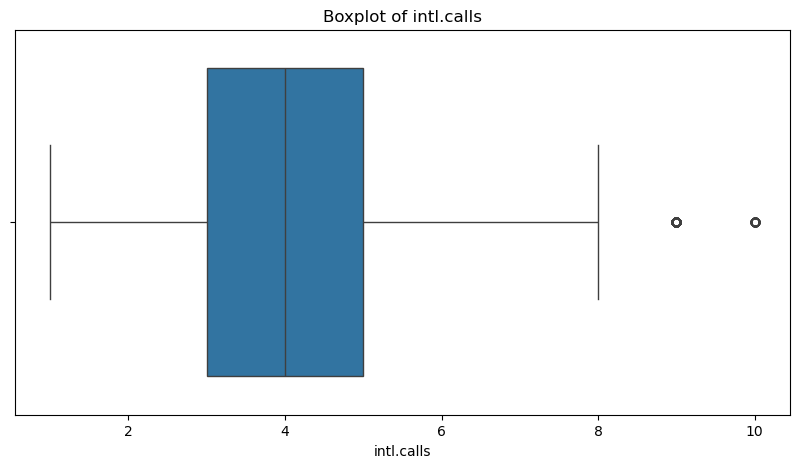

Number of Outliers detected: 197



In [35]:
univariate_analysis(df,'intl.calls')

Analyzing column: intl.charge

count    4158.000000
mean        2.785267
std         0.693247
min         0.890000
25%         2.320000
50%         2.810000
75%         3.240000
max         4.640000
Name: intl.charge, dtype: float64


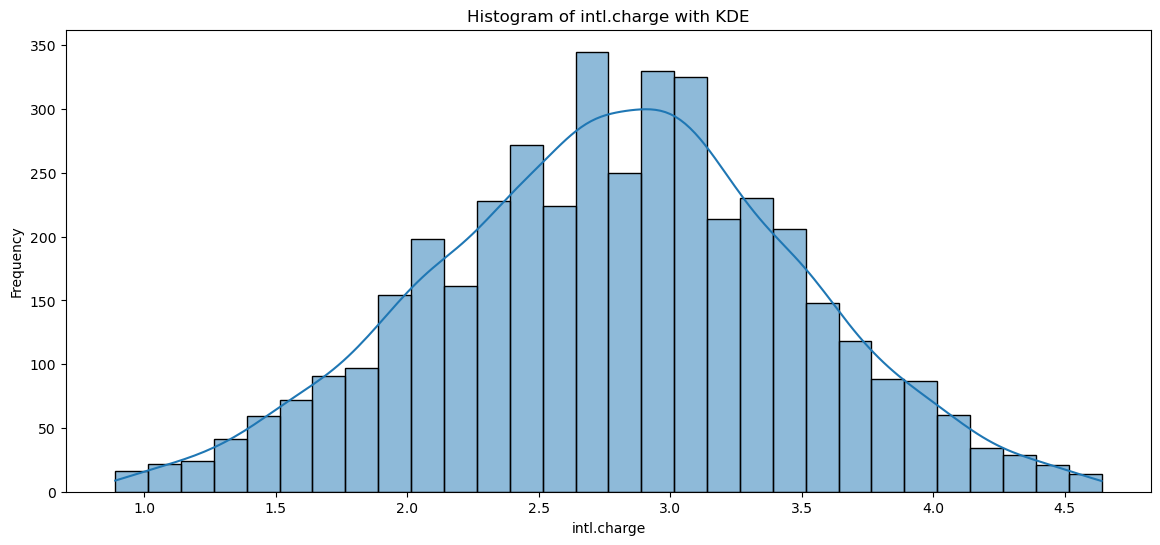

Skewness: -0.06580209517159756
Kurtosis: -0.24370983462916618



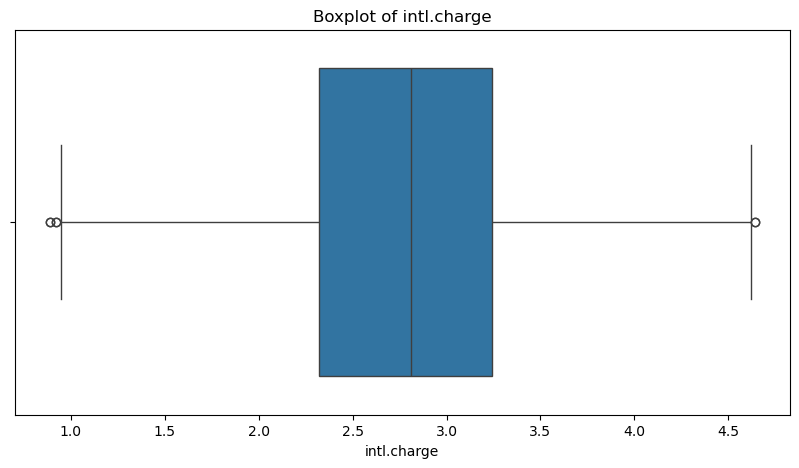

Number of Outliers detected: 6



In [36]:
univariate_analysis(df,'intl.charge')

Analyzing column: day.mins

count    4158.000000
mean      180.137133
std        52.350473
min        35.100000
25%       143.800000
50%       180.000000
75%       215.900000
max       324.700000
Name: day.mins, dtype: float64


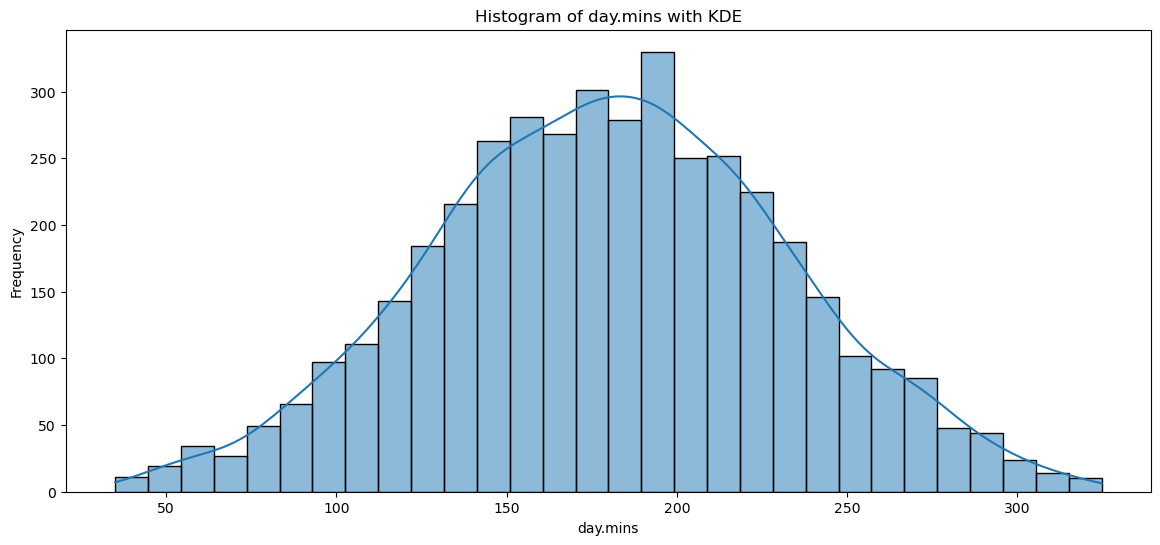

Skewness: -0.0076742489739712325
Kurtosis: -0.2457590677155297



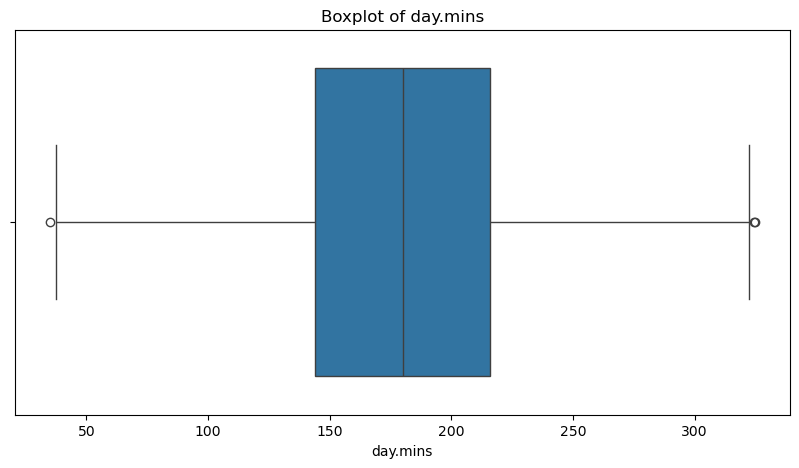

Number of Outliers detected: 3



In [37]:
univariate_analysis(df,'day.mins')

Analyzing column: day.calls

count    4158.000000
mean       99.993987
std        19.214005
min        48.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       152.000000
Name: day.calls, dtype: float64


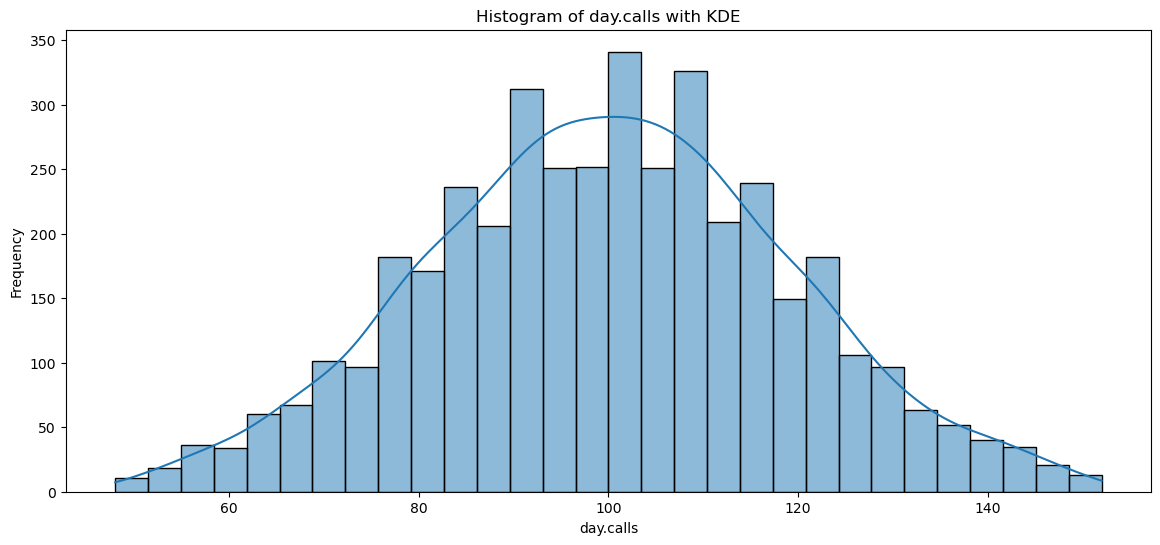

Skewness: 0.01687775990419338
Kurtosis: -0.2450032353286522



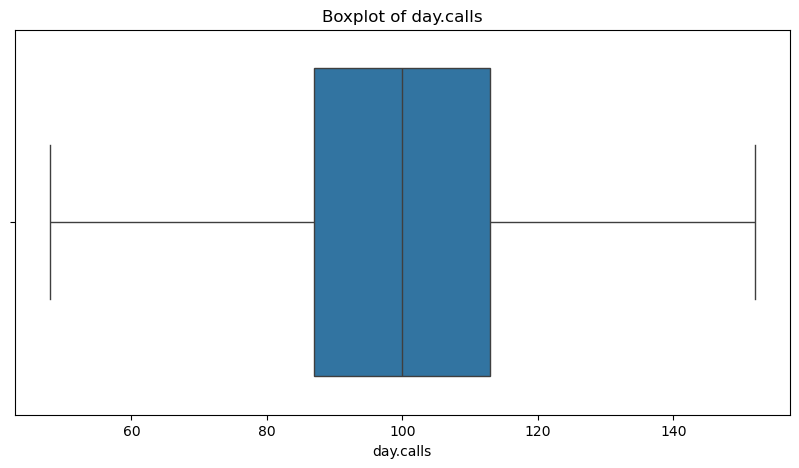

Number of Outliers detected: 0



In [38]:
univariate_analysis(df,'day.calls')

Analyzing column: day.charge

count    4158.000000
mean       30.628493
std         8.896878
min         5.970000
25%        24.460000
50%        30.610000
75%        36.700000
max        55.200000
Name: day.charge, dtype: float64


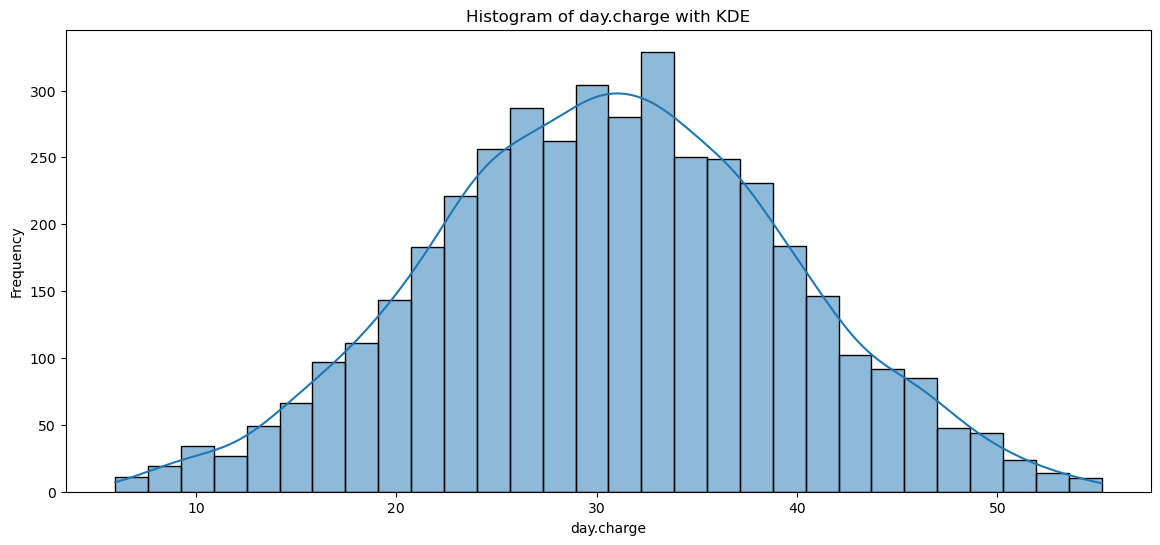

Skewness: -0.00873148682820697
Kurtosis: -0.24290164747160992



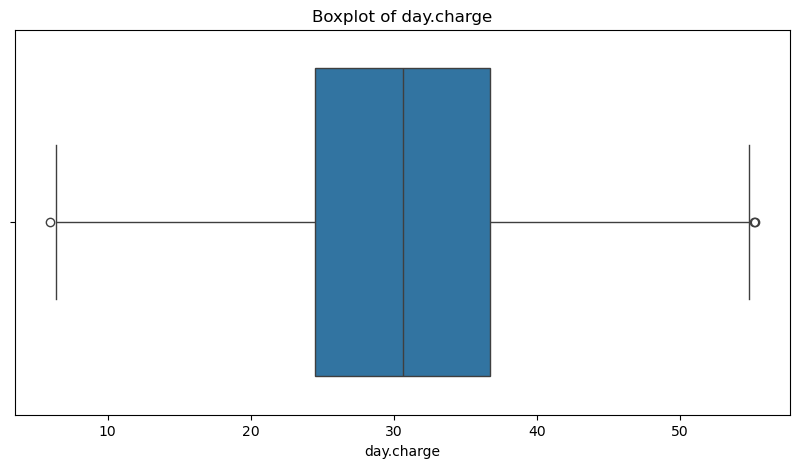

Number of Outliers detected: 3



In [39]:
univariate_analysis(df,'day.charge')

Analyzing column: eve.mins

count    4158.000000
mean      200.598357
std        48.747776
min        66.000000
25%       167.100000
50%       200.700000
75%       233.675000
max       334.100000
Name: eve.mins, dtype: float64


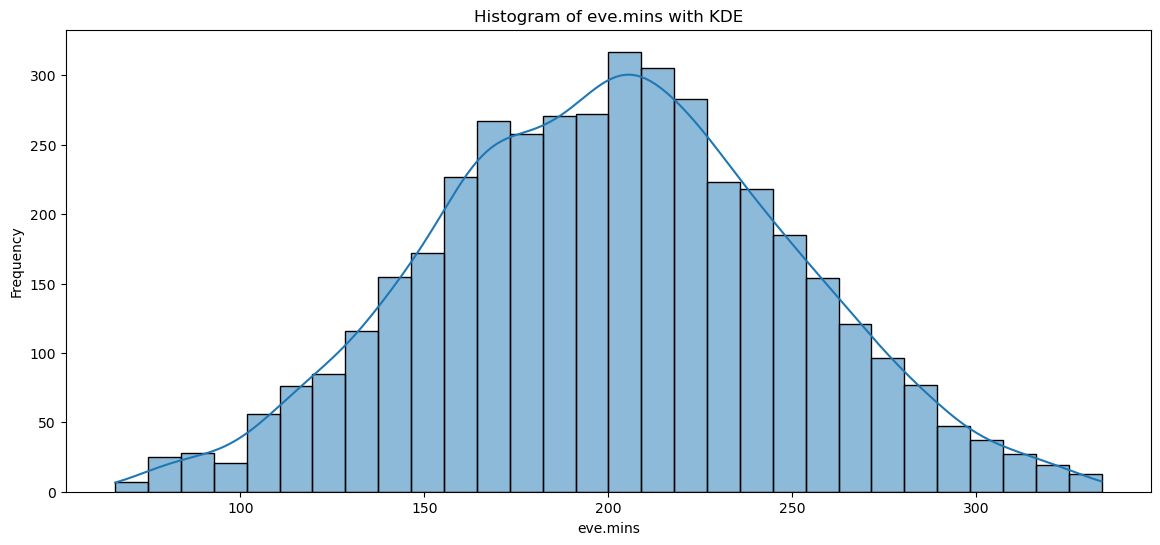

Skewness: 0.00806538156475146
Kurtosis: -0.2656017576486134



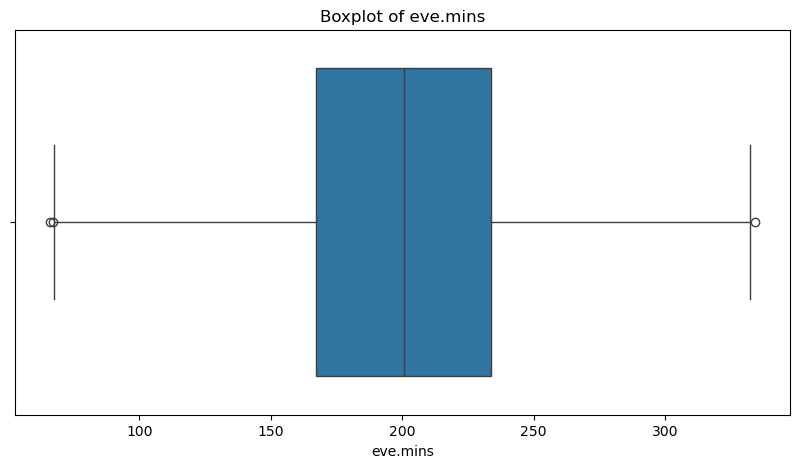

Number of Outliers detected: 3



In [40]:
univariate_analysis(df,'eve.mins')

Analyzing column: eve.calls

count    4158.000000
mean      100.178692
std        19.321895
min        47.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       154.000000
Name: eve.calls, dtype: float64


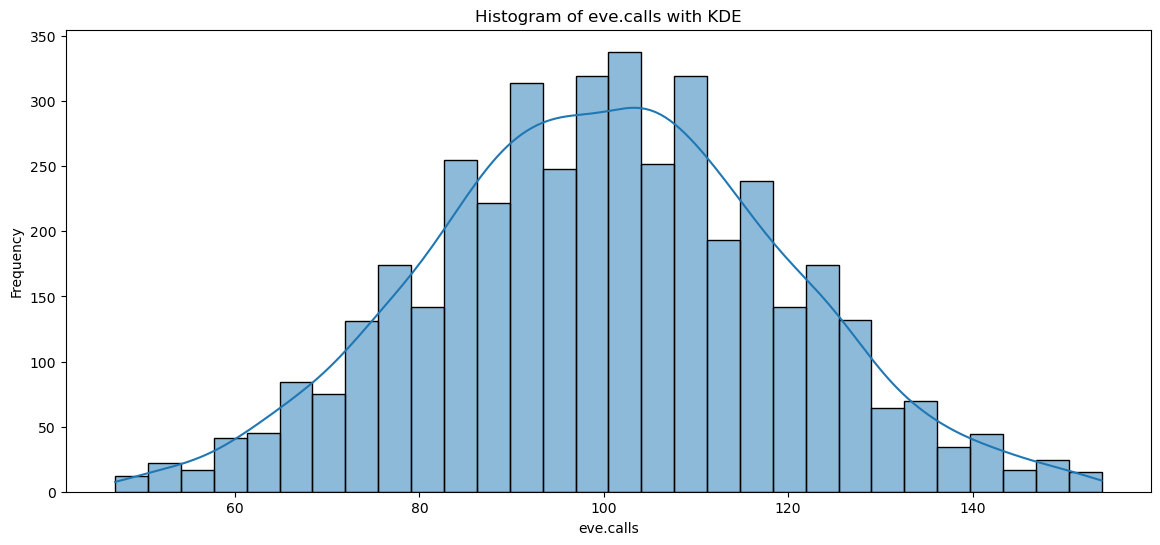

Skewness: 0.028521532841161604
Kurtosis: -0.1925890766075753



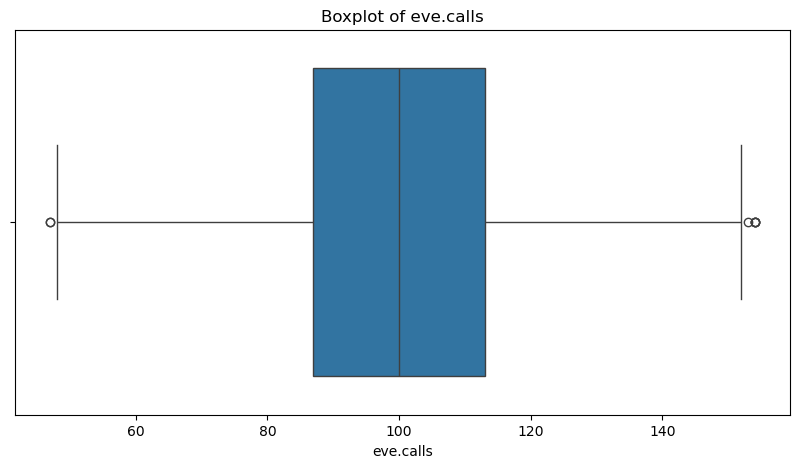

Number of Outliers detected: 7



In [41]:
univariate_analysis(df,'eve.calls')

Analyzing column: eve.charge

count    4158.000000
mean       17.058357
std         4.155481
min         5.610000
25%        14.200000
50%        17.090000
75%        19.870000
max        28.400000
Name: eve.charge, dtype: float64


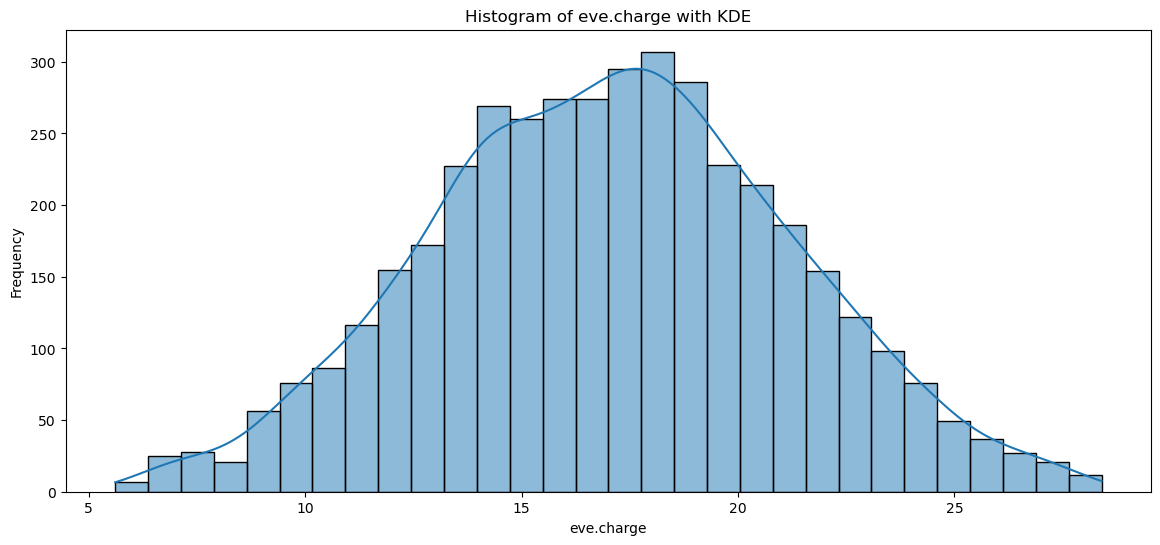

Skewness: 0.009598862322714584
Kurtosis: -0.278649565884558



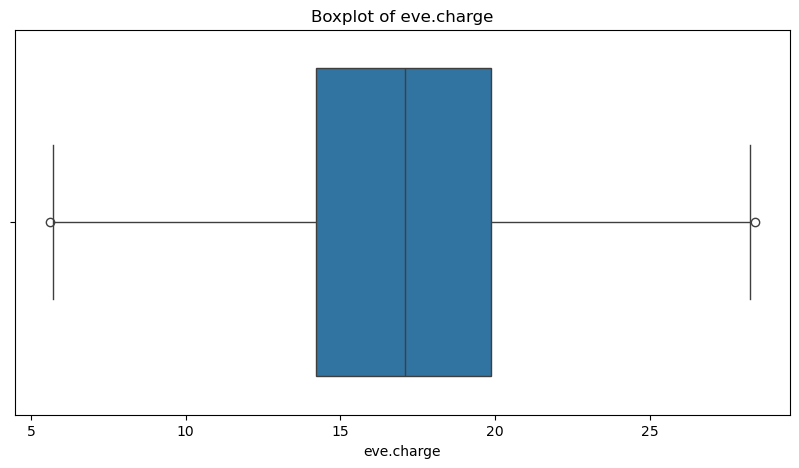

Number of Outliers detected: 2



In [42]:
univariate_analysis(df,'eve.charge')

Analyzing column: night.mins

count    4158.000000
mean      200.481626
std        48.947347
min        65.700000
25%       167.300000
50%       200.200000
75%       234.875000
max       336.100000
Name: night.mins, dtype: float64


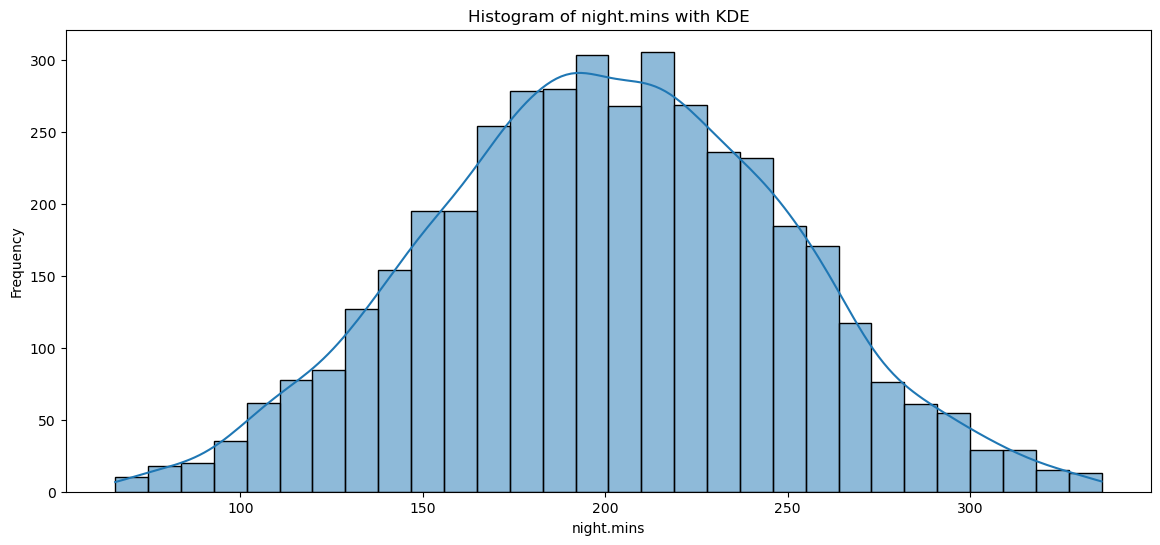

Skewness: -0.0006648381266826237
Kurtosis: -0.27512186550213036



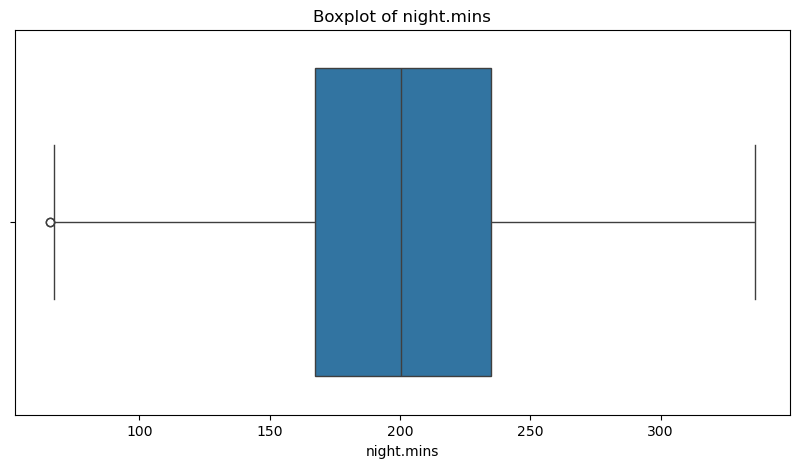

Number of Outliers detected: 2



In [43]:
univariate_analysis(df,'night.mins')

Analyzing column: night.calls

count    4158.000000
mean       99.838384
std        19.199642
min        48.000000
25%        87.000000
50%       100.000000
75%       113.000000
max       152.000000
Name: night.calls, dtype: float64


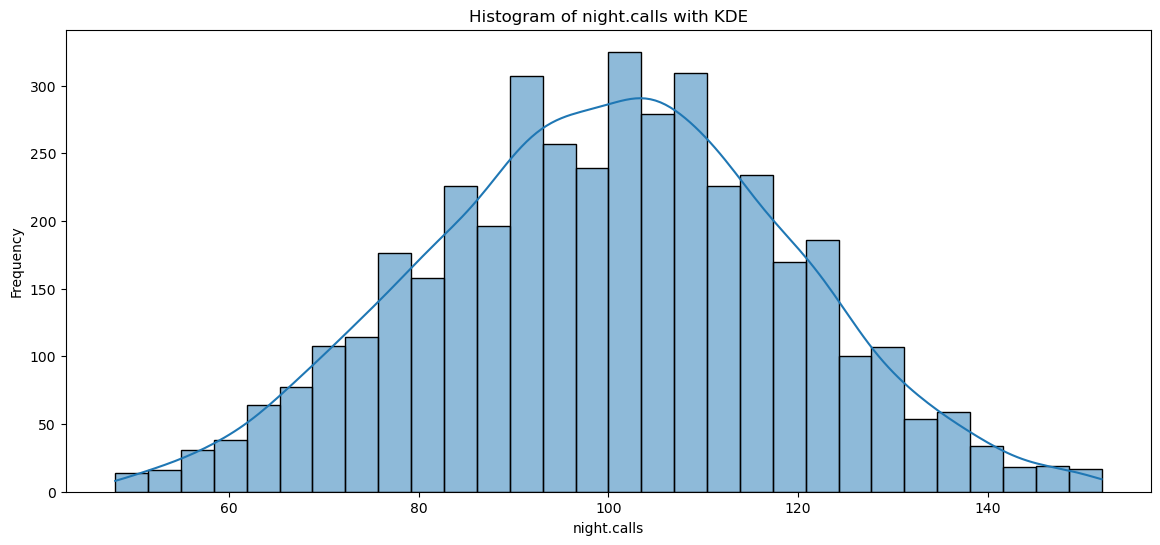

Skewness: -0.02800323210709011
Kurtosis: -0.2822596436381488



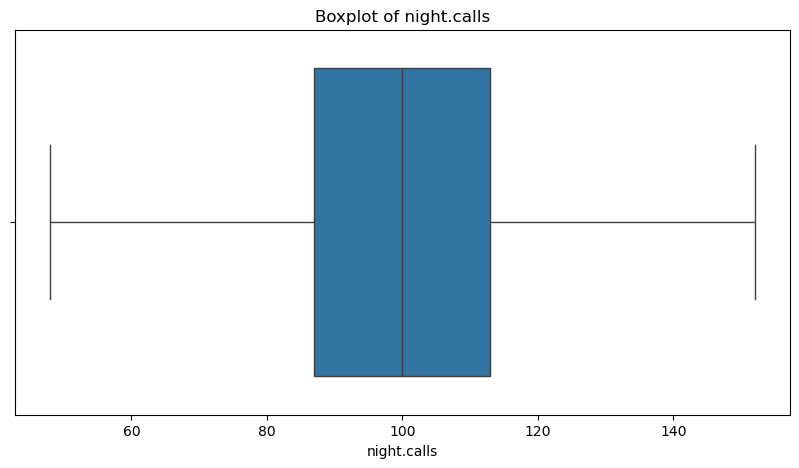

Number of Outliers detected: 0



In [44]:
univariate_analysis(df,'night.calls')

Analyzing column: night.charge

count    4158.000000
mean        9.021777
std         2.202645
min         2.960000
25%         7.530000
50%         9.010000
75%        10.570000
max        15.120000
Name: night.charge, dtype: float64


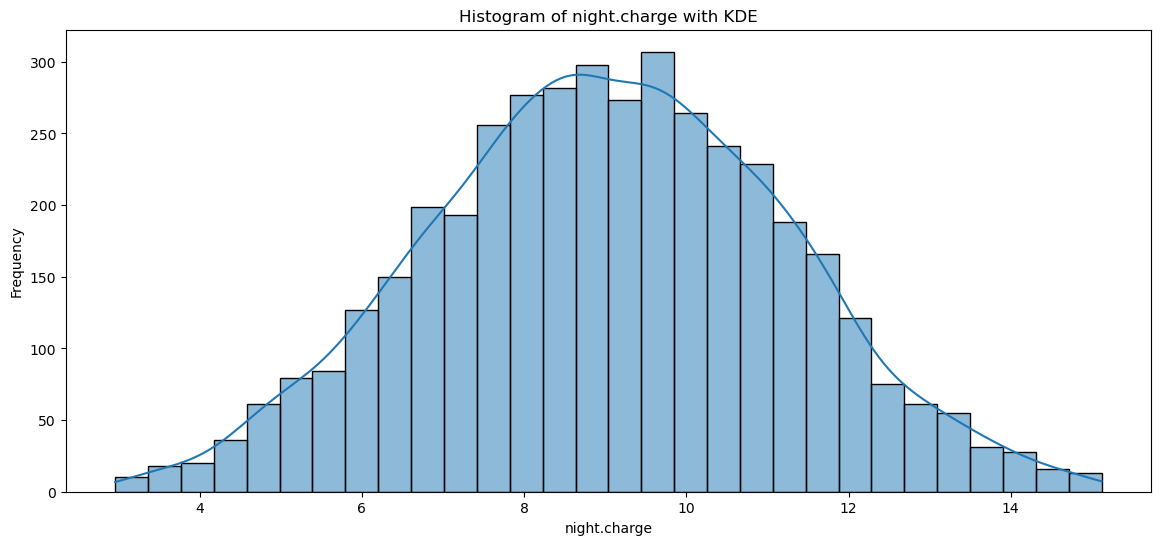

Skewness: -0.0006485550975305114
Kurtosis: -0.2753106845294364



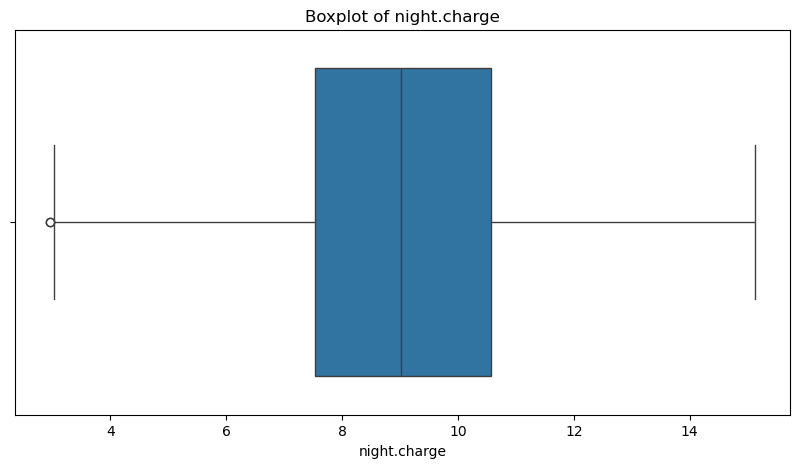

Number of Outliers detected: 2



In [45]:
univariate_analysis(df,'night.charge')

Analyzing column: customer.calls

count    4158.000000
mean        1.316258
std         0.977141
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: customer.calls, dtype: float64


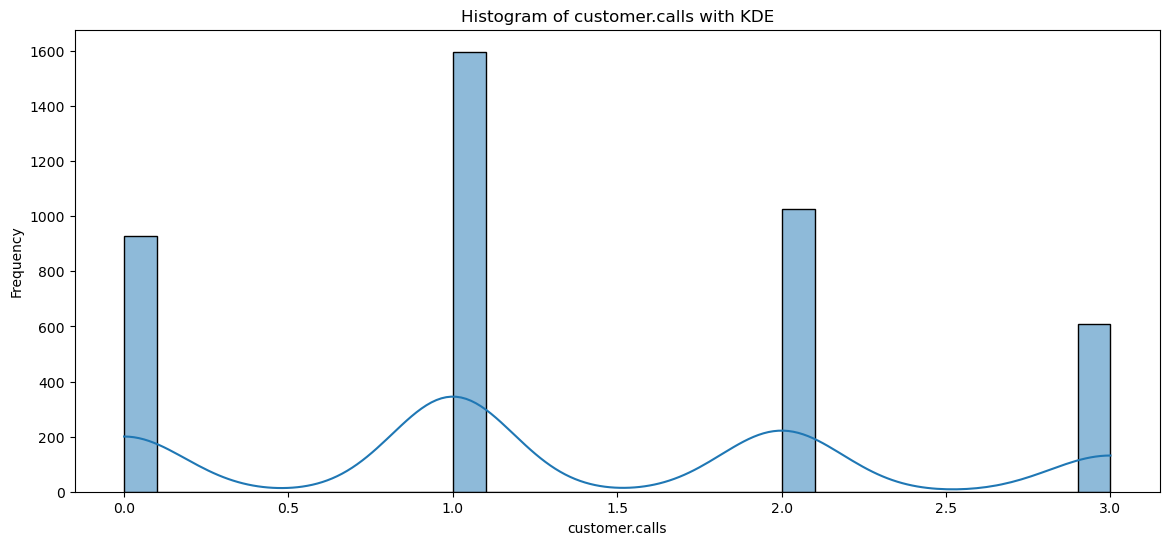

Skewness: 0.27490562343834346
Kurtosis: -0.9121018276499511



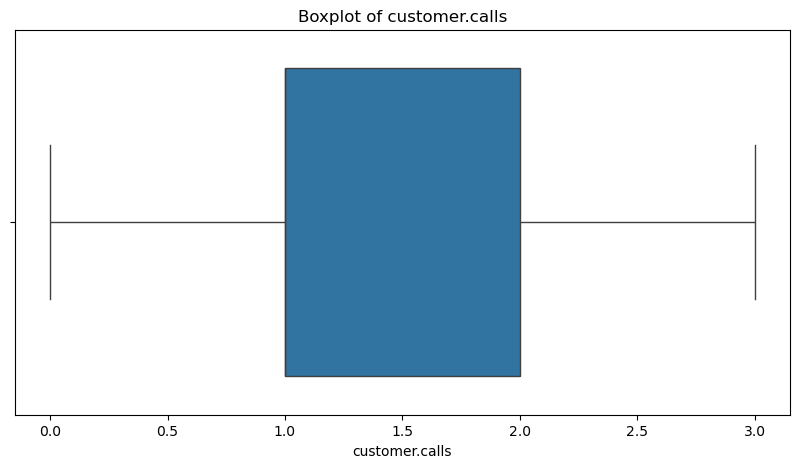

Number of Outliers detected: 0



In [46]:
univariate_analysis(df,'customer.calls')

In [47]:
df.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

In [48]:
df.head()

state  area.code  account.length  voice.plan  voice.messages  intl.plan  \
0     16          1           128.0           1            25.0          0   
1     35          1           107.0           1            26.0          0   
2     31          1           137.0           0             0.0          0   
4     36          1            75.0           0             0.0          1   
5      1          2           118.0           0             0.0          1   

   intl.mins  intl.calls  intl.charge  day.mins  day.calls  day.charge  \
0       10.0         3.0         2.70     265.1      110.0       45.07   
1       13.7         3.0         3.70     161.6      123.0       27.47   
2       12.2         5.0         3.29     243.4      114.0       41.38   
4       10.1         3.0         2.73     166.7      113.0       28.34   
5        6.3         6.0         1.70     223.4       98.0       37.98   

   eve.mins  eve.calls  eve.charge  night.mins  night.calls  night.charge  \
0     197.4       99.0       16.78       244.7         91.0         11.01   
1     195.5      103.0       16.62       254.4        103.0         11.45   
2     121.2      110.0       10.30       162.6        104.0          7.32   
4     148.3      122.0       12.61       186.9        121.0          8.41   
5     220.6      101.0       18.75       203.9        118.0          9.18   

   customer.calls  churn  
0             1.0      0  
1             1.0      0  
2             0.0      0  
4             3.0      0  
5             0.0      0

In [49]:
# Check the data types
print(df.dtypes)

# Check for missing values
print(df.isna().sum())

state               int32
area.code           int32
account.length    float64
voice.plan          int32
voice.messages    float64
intl.plan           int32
intl.mins         float64
intl.calls        float64
intl.charge       float64
day.mins          float64
day.calls         float64
day.charge        float64
eve.mins          float64
eve.calls         float64
eve.charge        float64
night.mins        float64
night.calls       float64
night.charge      float64
customer.calls    float64
churn               int32
dtype: object
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


## Bivariate Analysis

In [50]:
def bivariate_analysis(df, feature, target='churn'):
    
    # Convert categorical columns to numeric if needed
    if df[feature].dtype == 'object':
        df[feature] = df[feature].map({'yes': 1, 'no': 0})  # Adjust the mapping as needed for categorical features
    
    if df[target].dtype == 'object':
        df[target] = pd.to_numeric(df[target], errors='coerce')  # Converts non-numeric to NaN
    
    # Handle missing values by dropping them or filling with a method
    df = df.dropna(subset=[feature, target])  # Drop rows with NaN in feature or target

    # Check if the columns are numeric after conversion
    print(f"Data types after conversion: {df[feature].dtype}, {df[target].dtype}")

    # Scatter plots, correlation, and regression lines for each feature against the target
    print(f"Analyzing relationship between {feature} and {target}\n")

    # Correlation coefficient
    correlation = df[feature].corr(df[target])
    print(f"Correlation between {feature} and {target}: {correlation}\n")

    if pd.isna(correlation):
        print(f"Correlation is NaN. The columns might not have enough variation or valid numeric data.")
        return

    # Regression Line
    plt.figure(figsize=(14,6))
    sns.regplot(x=df[feature], y=df[target], scatter_kws={'s':10}, line_kws={'color':'red'})
    plt.title(f'Regression Line: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

    # Create a jointplot for two variables with scatter plot and KDE marginals
    plt.figure(figsize=(14,6))
    sns.jointplot(x=df[feature], y=df[target], data=df, kind='scatter')
    sns.kdeplot(x=df[feature], y=df[target], data=df, fill=True, color='blue', alpha=0.3)
    plt.suptitle(f"Jointplot of {feature} vs {target}", y=1.02)
    plt.show()


##### Adding a regression line to a scatter plot helps visualize the relationship between two variables by showing the best-fit line through the data points. It highlights the trend, indicating whether the relationship is positive, negative, or non-existent, and helps in understanding the strength and direction of the association between the variables.

##### A joint plot is used to visualize the relationship between two variables, showing both their individual distributions and their correlation. It provides a combined view of a scatter plot and histograms (or KDE plots), making it useful for identifying patterns, trends, and potential outliers in the data.


#### The regression line in a scatterplot indicates the relationship between two variables. 
##### Direction:

##### Positive Slope: If the line slopes upwards from left to right, it indicates a positive correlation, meaning as the independent variable (X) increases, the dependent variable (Y) also increases.

##### Negative Slope: If the line slopes downwards, it indicates a negative correlation, meaning as X increases, Y decreases.

Data types after conversion: int32, int32
Analyzing relationship between voice.plan and churn

Correlation between voice.plan and churn: -0.10548535746776222



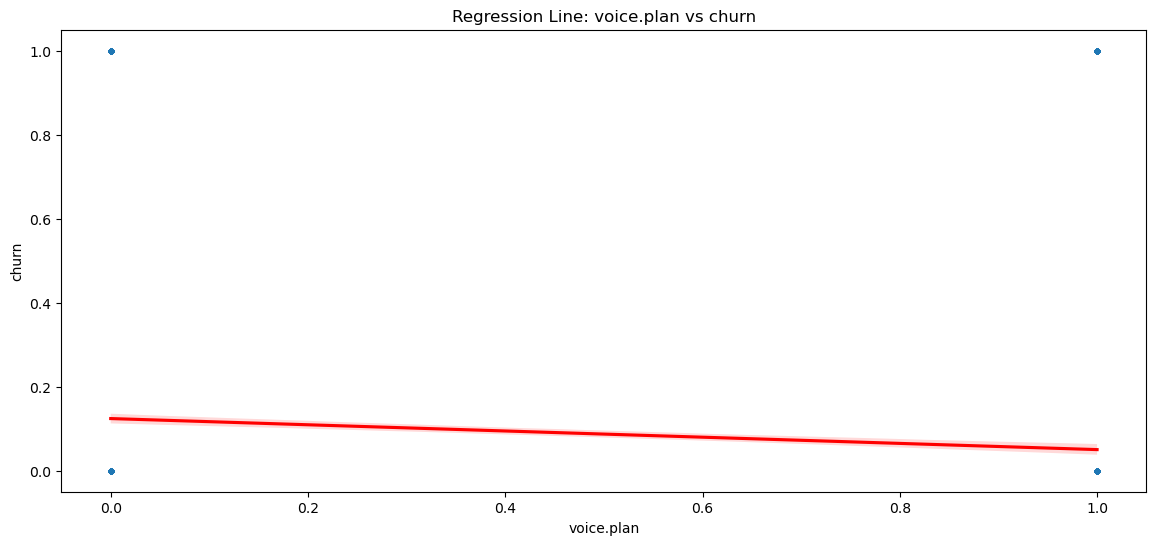

<Figure size 1400x600 with 0 Axes>

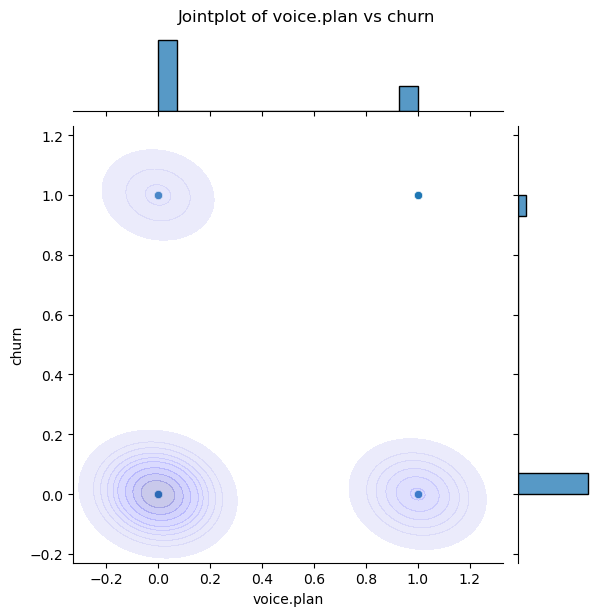

In [51]:
bivariate_analysis(df,'voice.plan')

Data types after conversion: float64, int32
Analyzing relationship between voice.messages and churn

Correlation between voice.messages and churn: -0.09520323353532885



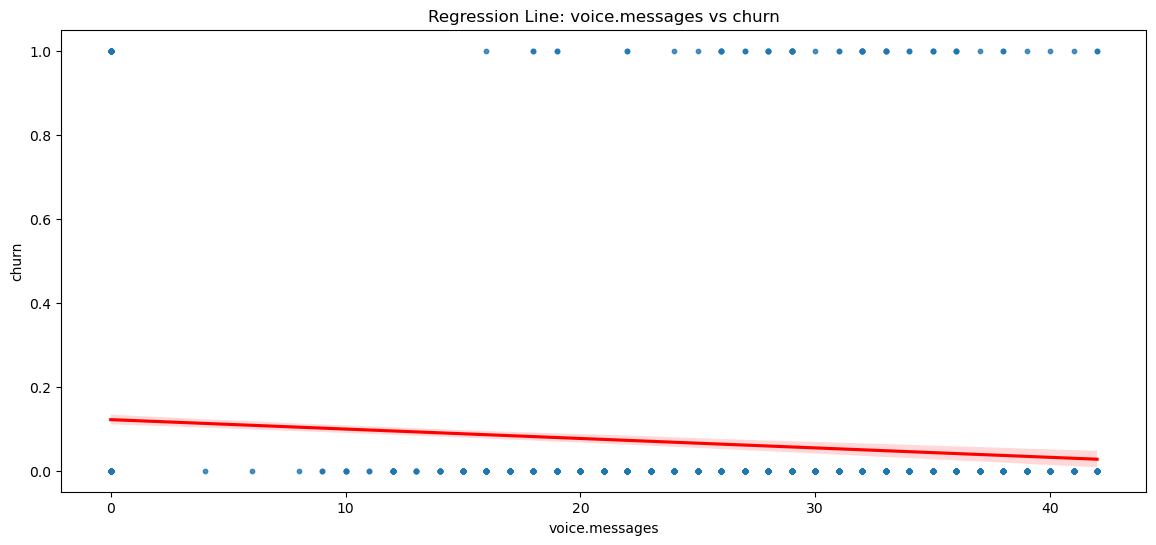

<Figure size 1400x600 with 0 Axes>

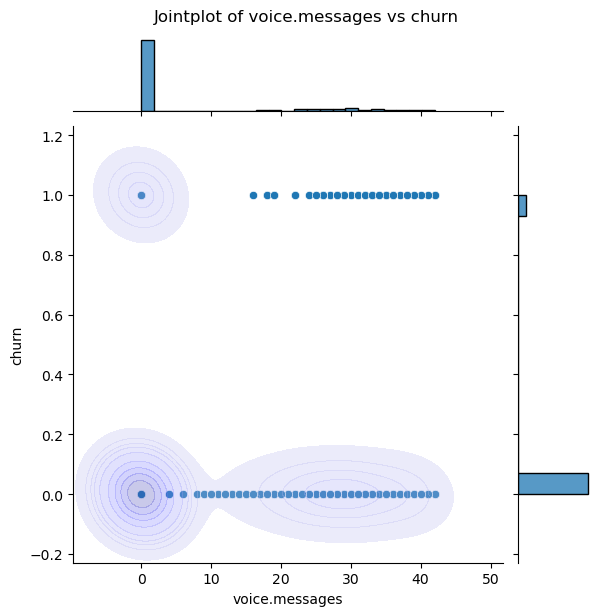

In [52]:
bivariate_analysis(df,'voice.messages')

Data types after conversion: int32, int32
Analyzing relationship between intl.plan and churn

Correlation between intl.plan and churn: 0.28429500992005713



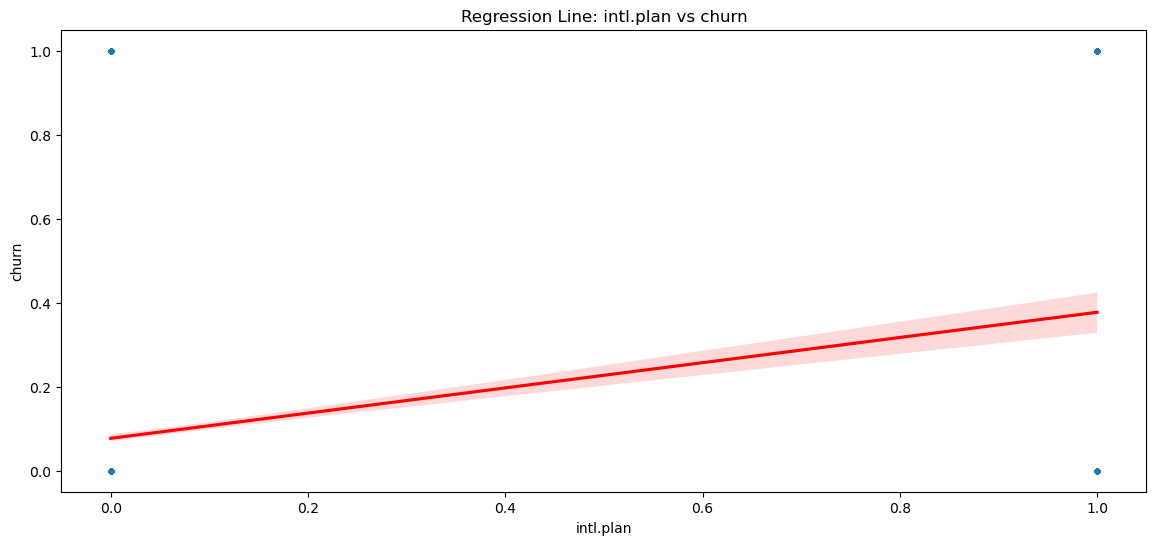

<Figure size 1400x600 with 0 Axes>

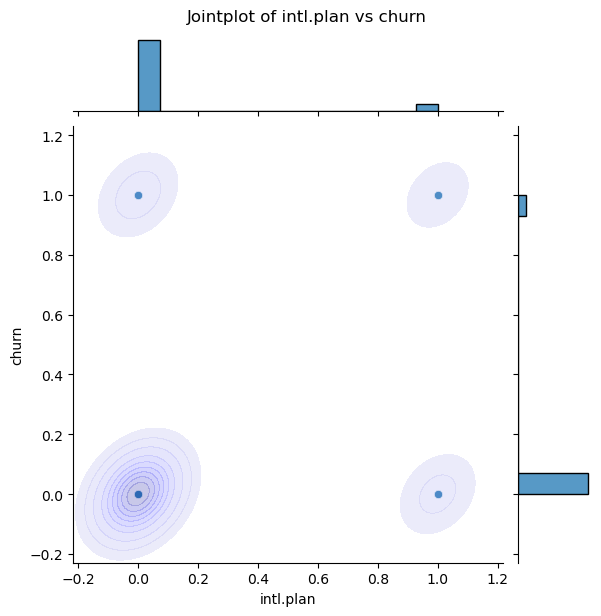

In [53]:
bivariate_analysis(df,'intl.plan')

Data types after conversion: float64, int32
Analyzing relationship between intl.mins and churn

Correlation between intl.mins and churn: 0.07331229524862892



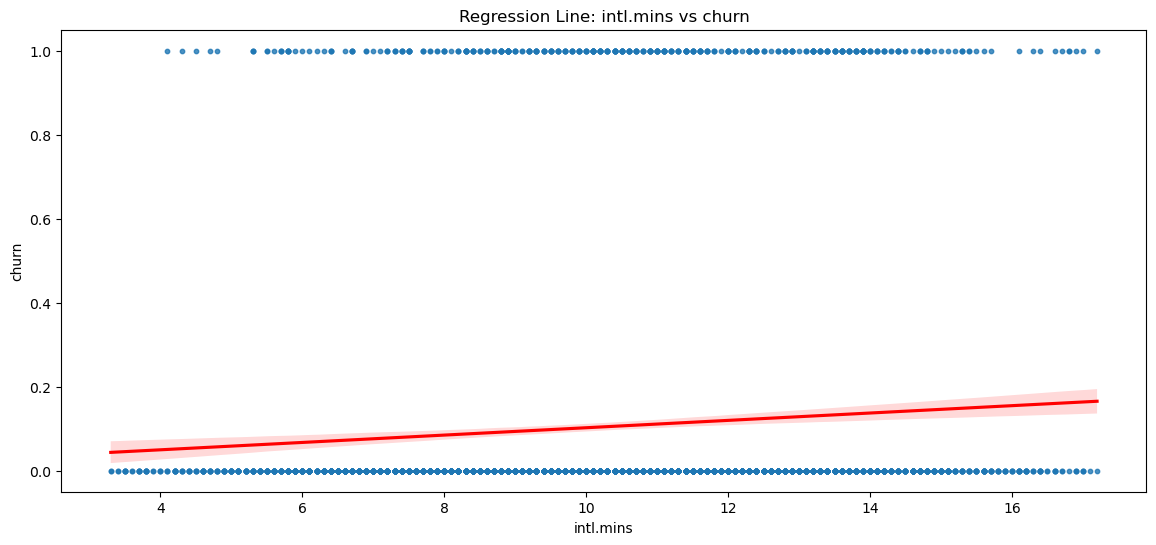

<Figure size 1400x600 with 0 Axes>

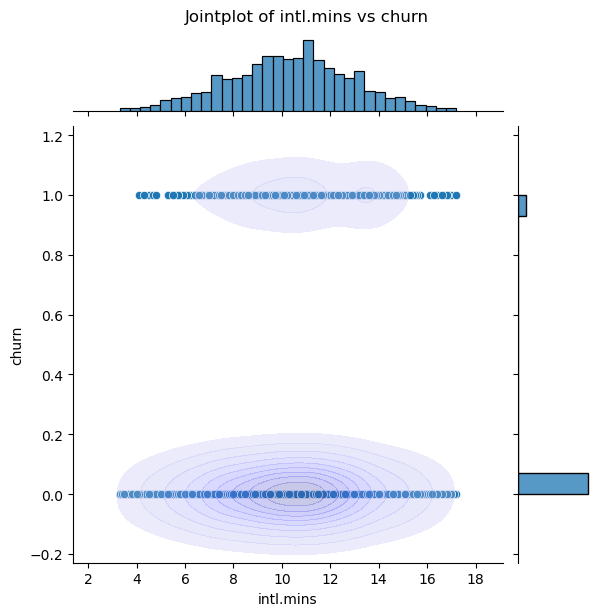

In [54]:
bivariate_analysis(df,'intl.mins')

Data types after conversion: float64, int32
Analyzing relationship between intl.calls and churn

Correlation between intl.calls and churn: -0.06142322542195206



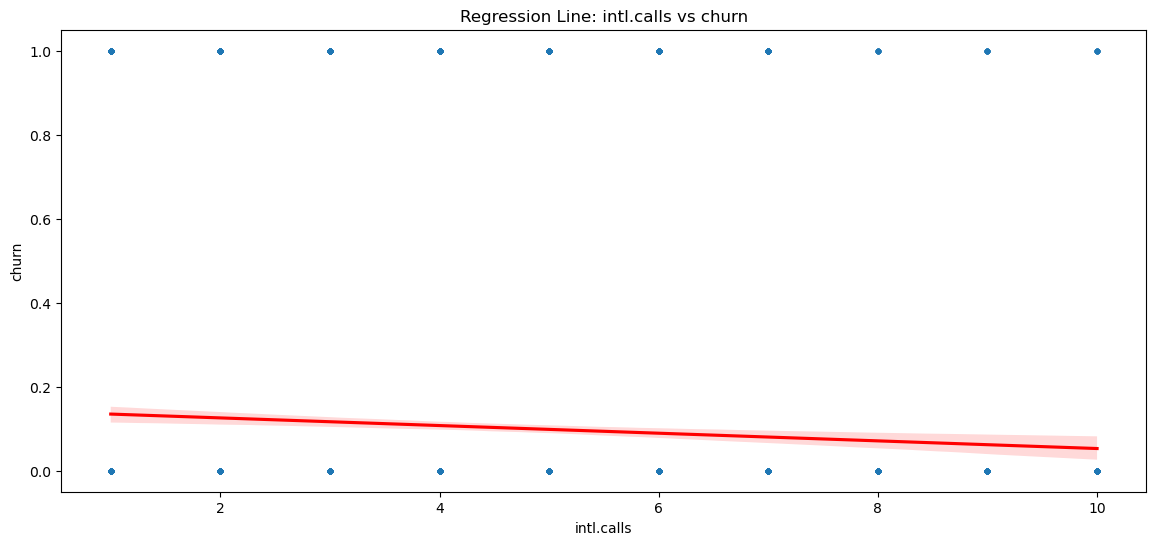

<Figure size 1400x600 with 0 Axes>

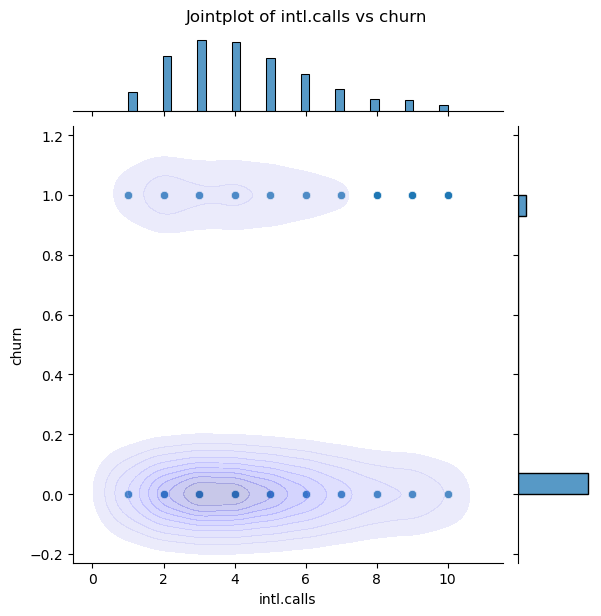

In [55]:
bivariate_analysis(df,'intl.calls')

Data types after conversion: float64, int32
Analyzing relationship between intl.charge and churn

Correlation between intl.charge and churn: 0.07330904146778054



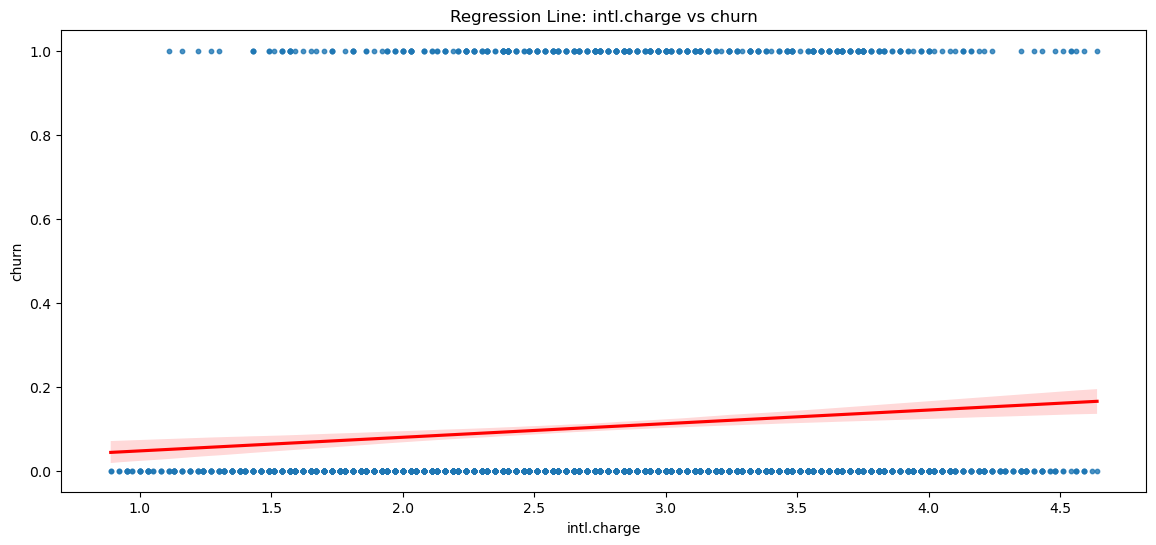

<Figure size 1400x600 with 0 Axes>

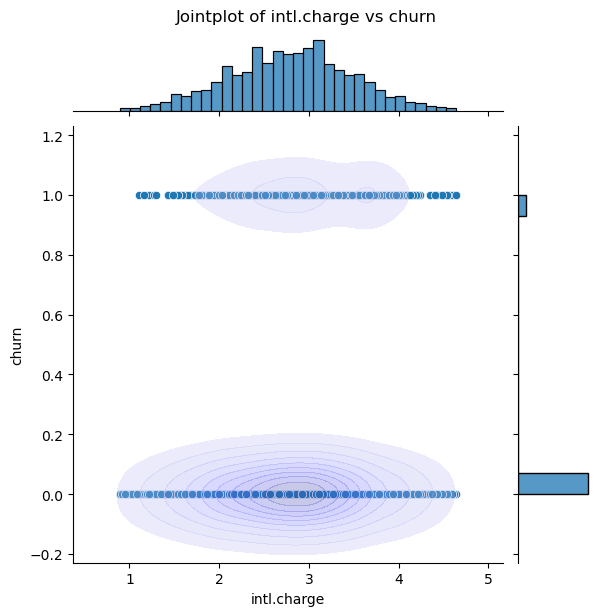

In [56]:
bivariate_analysis(df,'intl.charge')

Data types after conversion: float64, int32
Analyzing relationship between day.mins and churn

Correlation between day.mins and churn: 0.2932363872202863



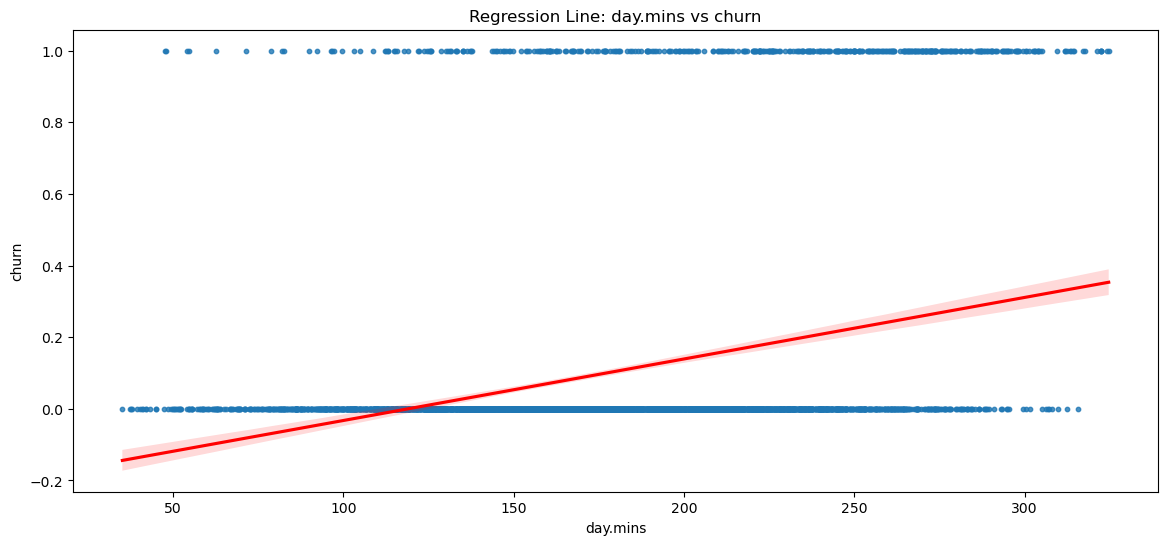

<Figure size 1400x600 with 0 Axes>

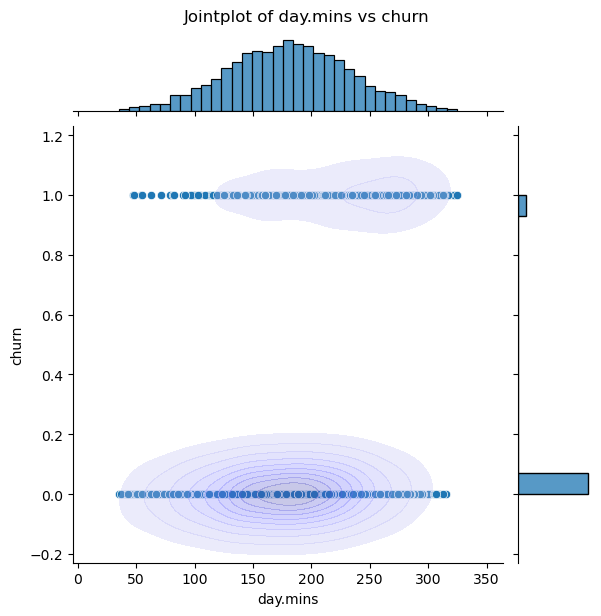

In [57]:
bivariate_analysis(df,'day.mins')

Data types after conversion: float64, int32
Analyzing relationship between day.calls and churn

Correlation between day.calls and churn: 0.015087872936502798



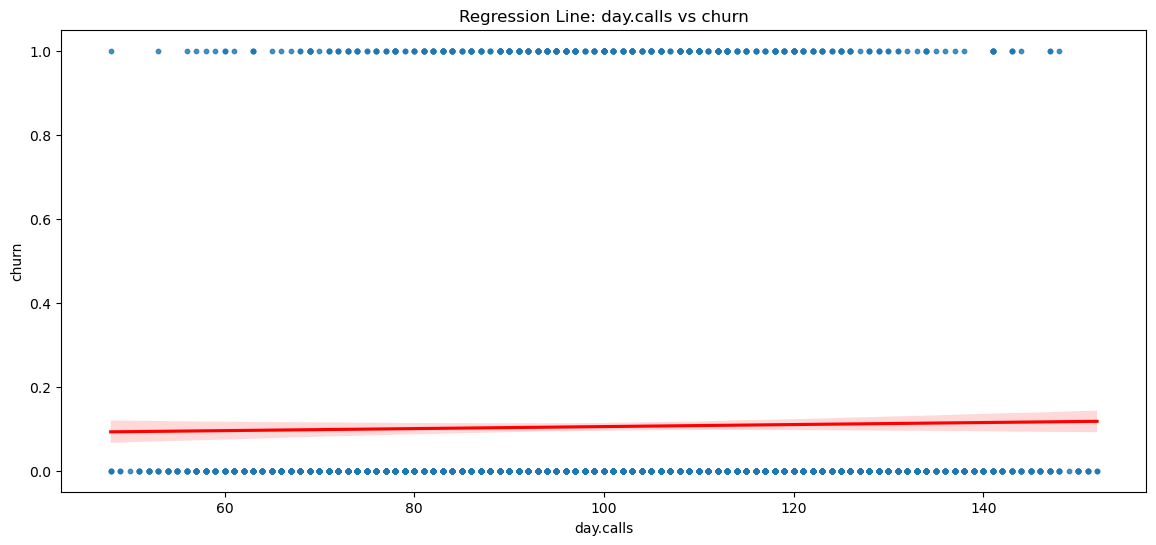

<Figure size 1400x600 with 0 Axes>

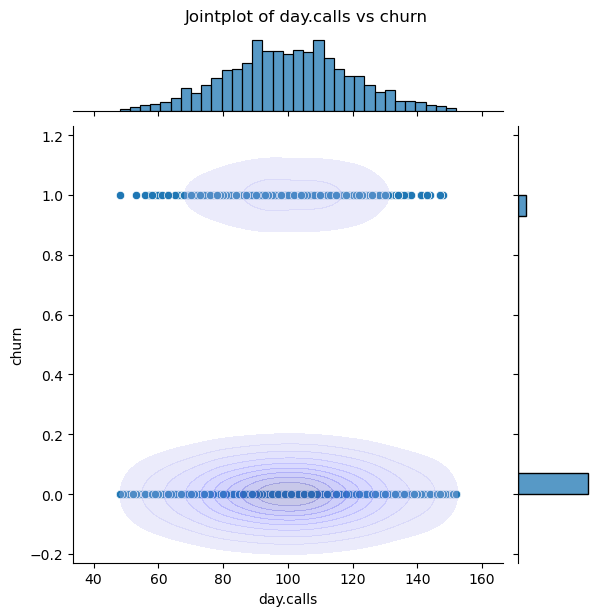

In [58]:
bivariate_analysis(df,'day.calls')

Data types after conversion: float64, int32
Analyzing relationship between day.charge and churn

Correlation between day.charge and churn: 0.29313797560557214



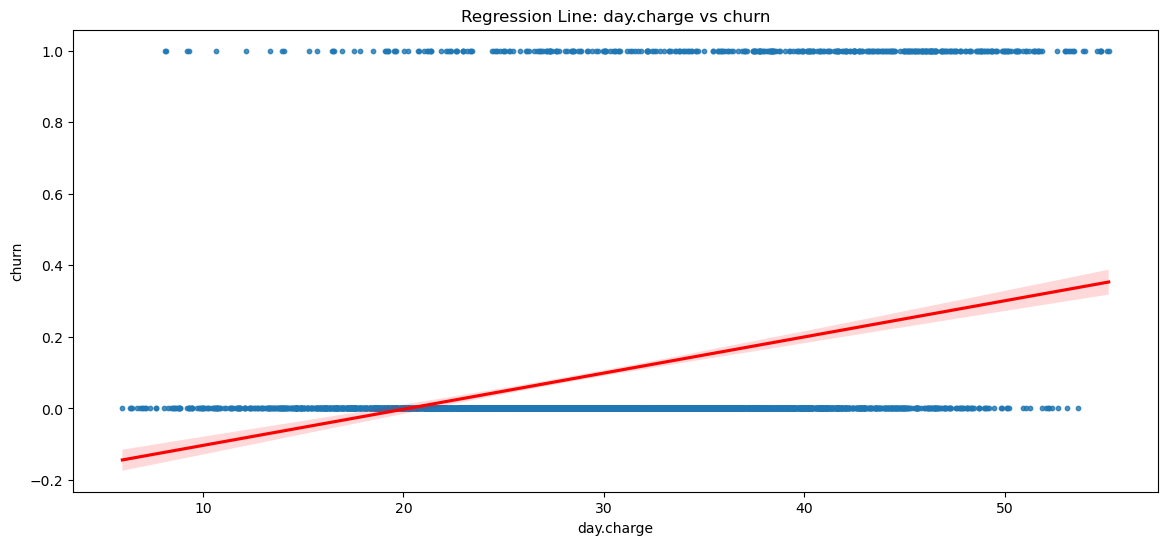

<Figure size 1400x600 with 0 Axes>

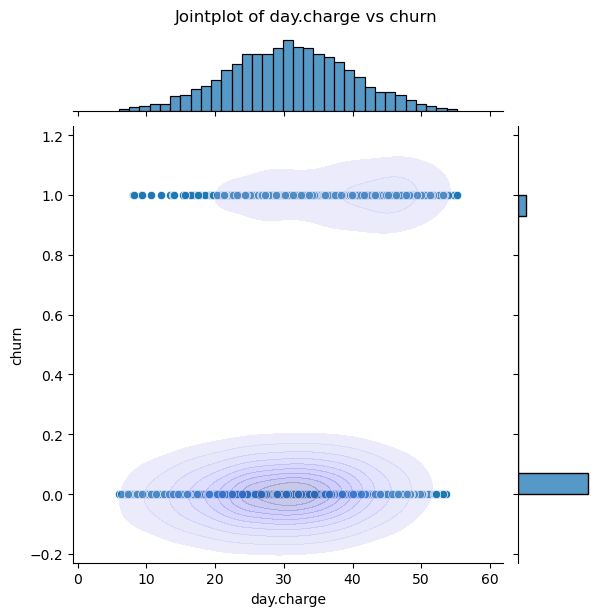

In [59]:
bivariate_analysis(df,'day.charge')

Data types after conversion: float64, int32
Analyzing relationship between eve.mins and churn

Correlation between eve.mins and churn: 0.13227631576352053



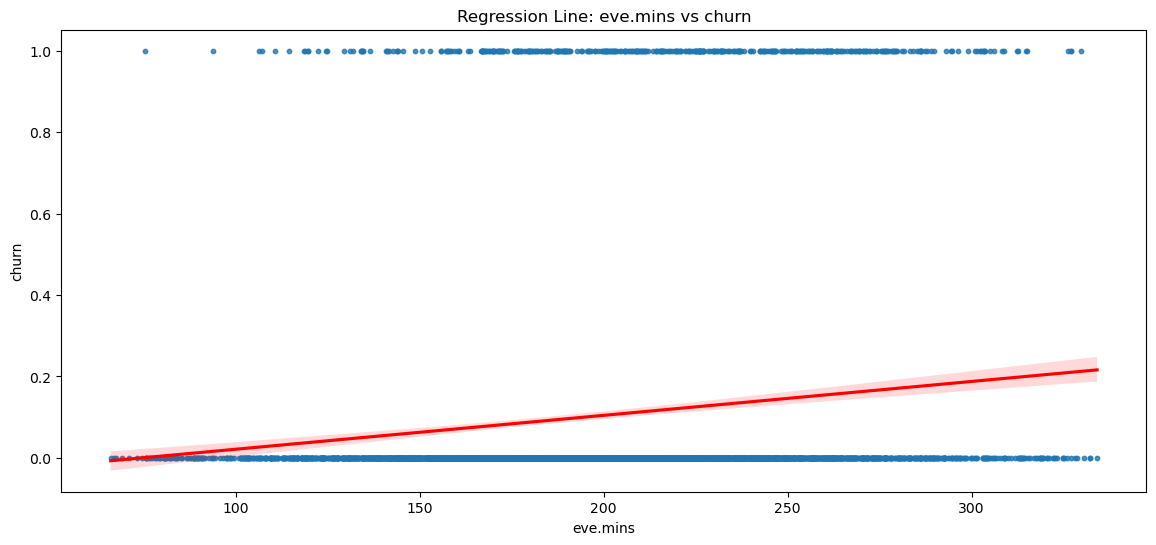

<Figure size 1400x600 with 0 Axes>

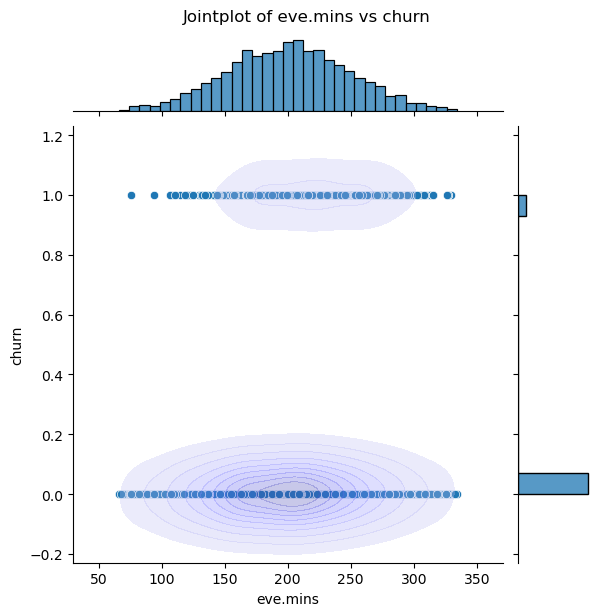

In [60]:
bivariate_analysis(df,'eve.mins')

Data types after conversion: float64, int32
Analyzing relationship between eve.calls and churn

Correlation between eve.calls and churn: -0.007147634975175369



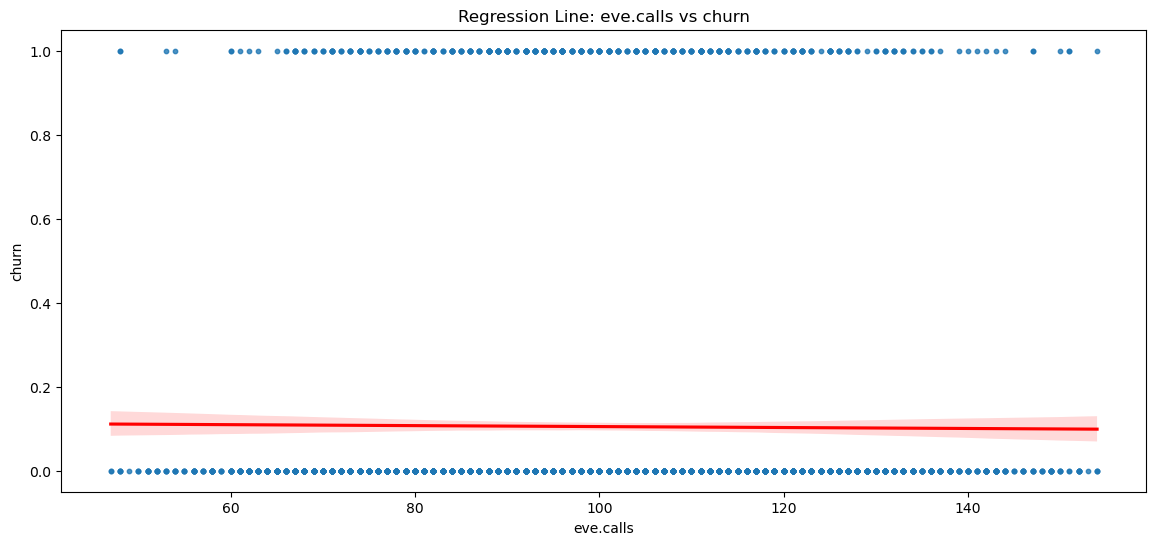

<Figure size 1400x600 with 0 Axes>

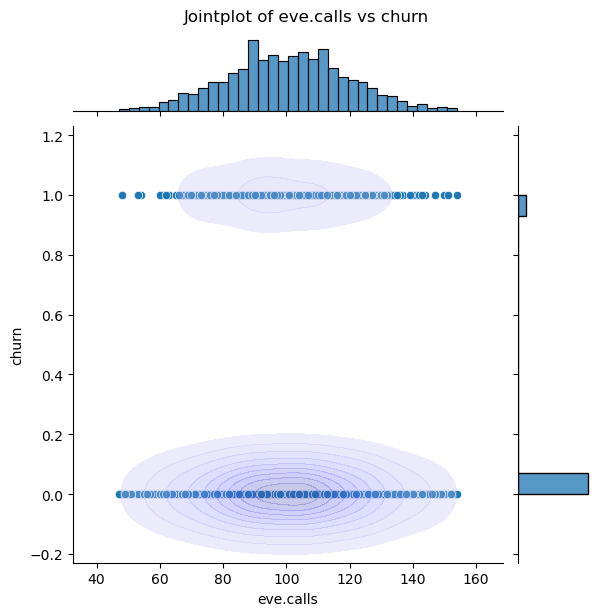

In [61]:
bivariate_analysis(df,'eve.calls')

Data types after conversion: float64, int32
Analyzing relationship between eve.charge and churn

Correlation between eve.charge and churn: 0.13236565172579465



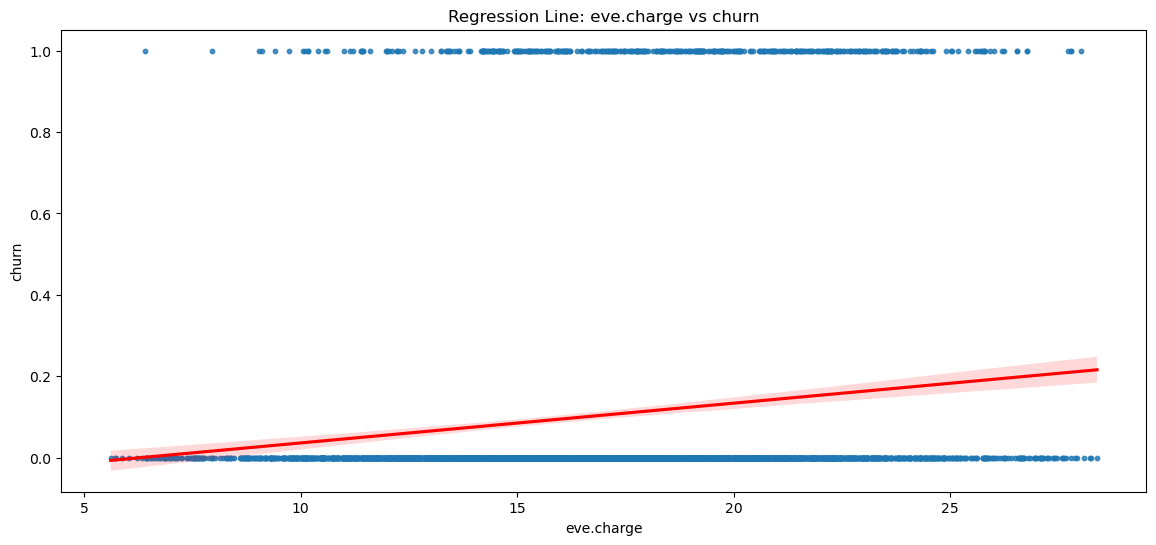

<Figure size 1400x600 with 0 Axes>

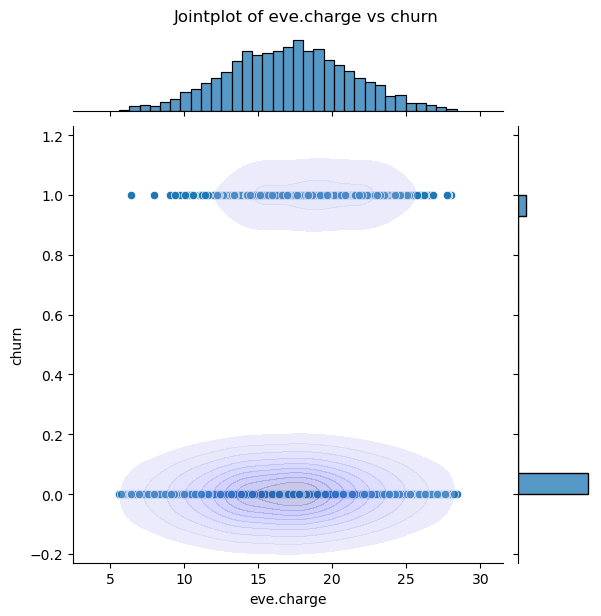

In [62]:
bivariate_analysis(df,'eve.charge')

Data types after conversion: float64, int32
Analyzing relationship between night.mins and churn

Correlation between night.mins and churn: 0.06850657698962069



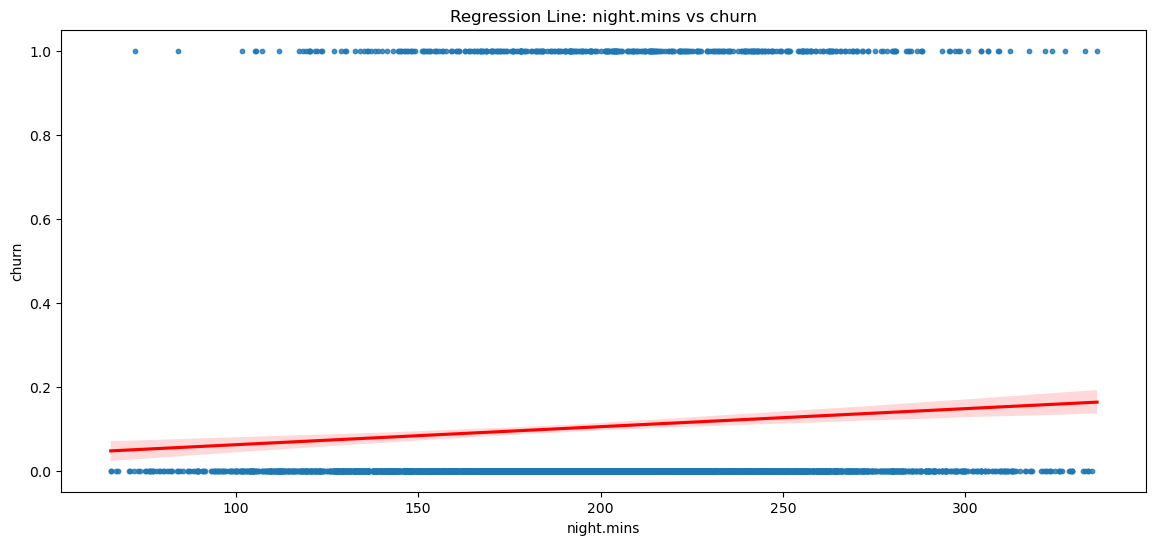

<Figure size 1400x600 with 0 Axes>

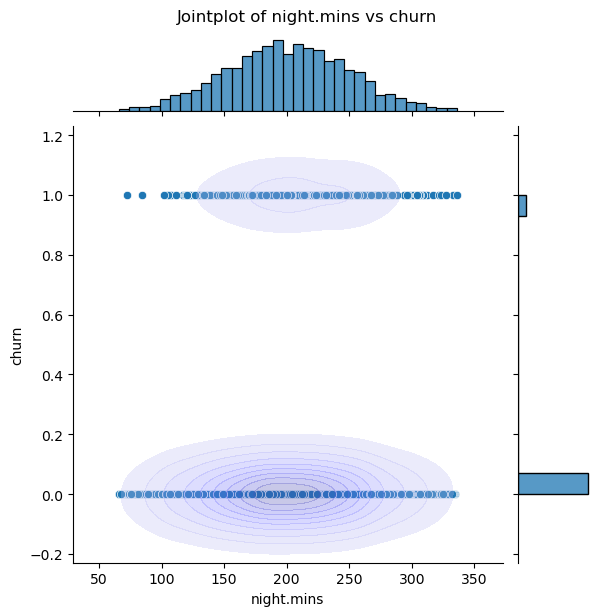

In [63]:
bivariate_analysis(df,'night.mins')

Data types after conversion: float64, int32
Analyzing relationship between night.calls and churn

Correlation between night.calls and churn: 0.001537020357997451



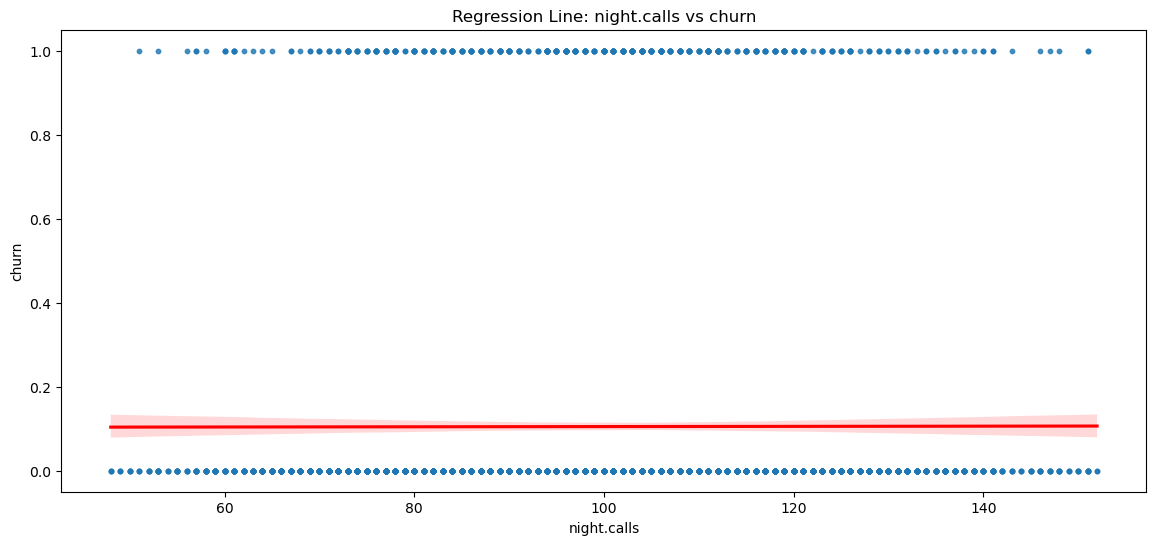

<Figure size 1400x600 with 0 Axes>

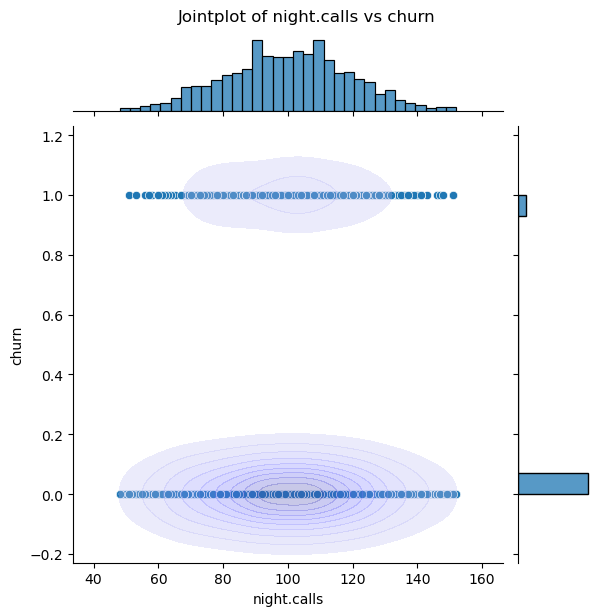

In [64]:
bivariate_analysis(df,'night.calls')

Data types after conversion: float64, int32
Analyzing relationship between night.charge and churn

Correlation between night.charge and churn: 0.06847729466919876



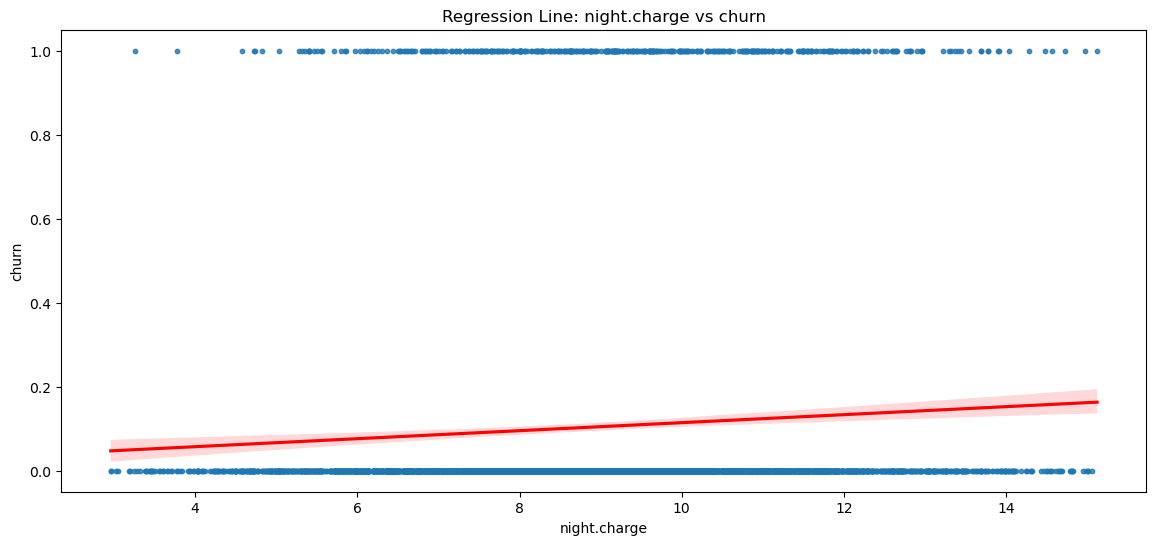

<Figure size 1400x600 with 0 Axes>

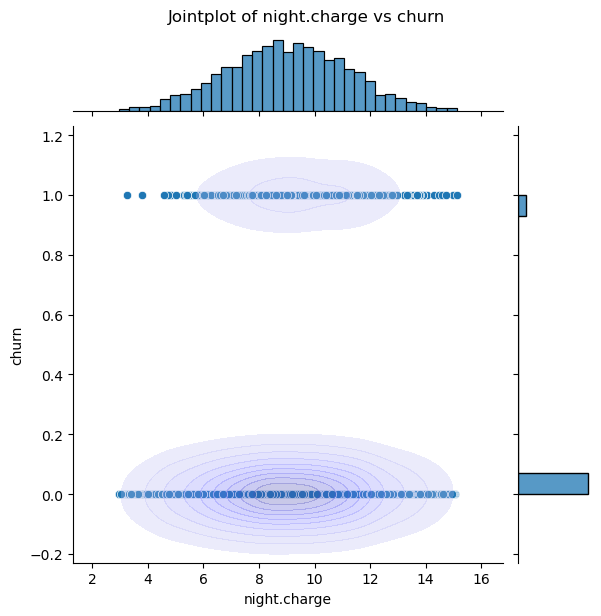

In [65]:
bivariate_analysis(df,'night.charge')

Data types after conversion: float64, int32
Analyzing relationship between customer.calls and churn

Correlation between customer.calls and churn: -0.008993389955260445



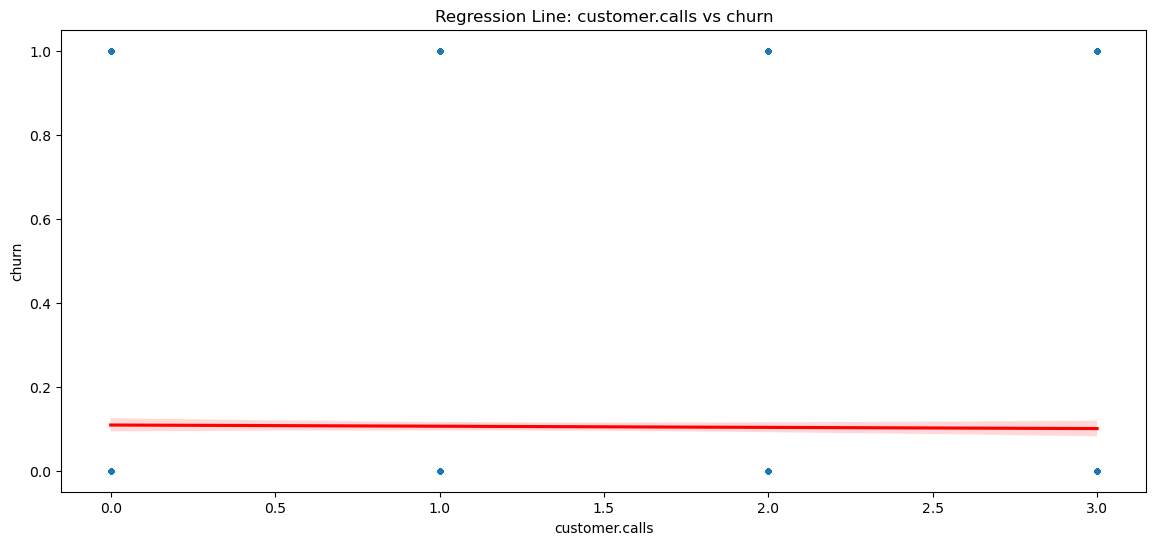

<Figure size 1400x600 with 0 Axes>

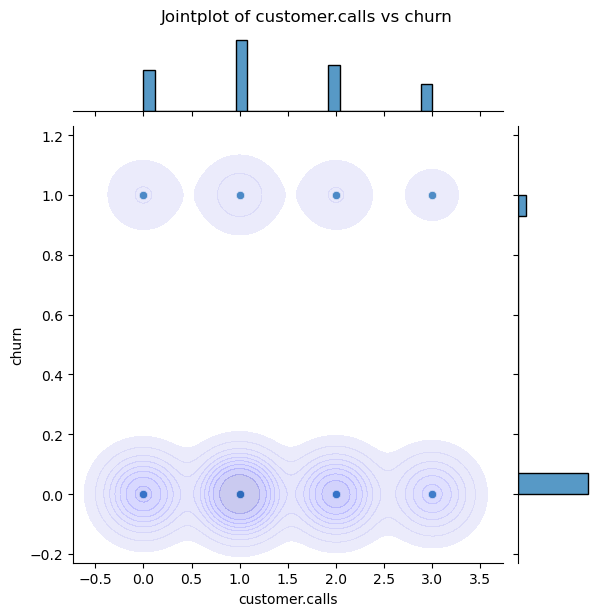

In [66]:
bivariate_analysis(df,'customer.calls')

In [67]:
df.columns

Index(['state', 'area.code', 'account.length', 'voice.plan', 'voice.messages',
       'intl.plan', 'intl.mins', 'intl.calls', 'intl.charge', 'day.mins',
       'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
       'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn'],
      dtype='object')

## Correlation Analysis

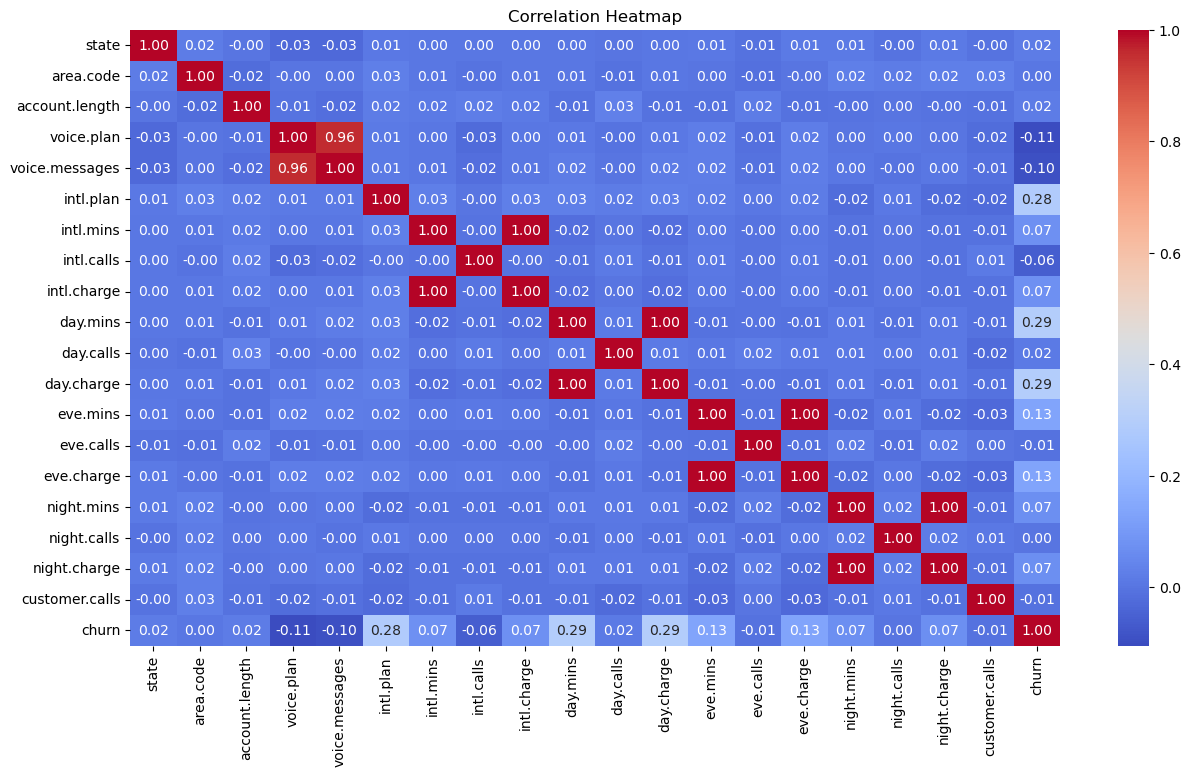

In [68]:
# Compute correlation
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [69]:
# List of redundant columns to drop based on high correlation
columns_to_drop = ['intl.charge', 'day.charge', 'eve.charge', 'night.charge', 'voice.messages']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the updated DataFrame structure
print("Columns after dropping redundant ones:")
print(df.columns)

Columns after dropping redundant ones:
Index(['state', 'area.code', 'account.length', 'voice.plan', 'intl.plan',
       'intl.mins', 'intl.calls', 'day.mins', 'day.calls', 'eve.mins',
       'eve.calls', 'night.mins', 'night.calls', 'customer.calls', 'churn'],
      dtype='object')


#### Why Drop Columns Based on the Correlation Matrix?

We drop columns based on the correlation matrix to eliminate **multicollinearity**, which arises when two or more features are highly correlated (correlation coefficient close to `1` or `-1`). Multicollinearity can destabilize models and make interpretation difficult, so removing these features ensures the dataset is efficient and free of redundancy.

#### Range for Dropping Columns:
- Features with a **correlation coefficient above 0.9 (or close to 1.0)** are considered highly correlated.
- These columns provide overlapping information and are unnecessary for the model.

#### Benefits of Dropping Correlated Columns:
1. **Eliminates Multicollinearity**: By removing highly correlated features, we address multicollinearity, ensuring a stable and interpretable model.
2. **Improves Model Interpretability**: Reduces redundancy, making it easier to understand the influence of features on the target variable.
3. **Reduces Overfitting**: Prevents the model from capturing noise introduced by redundant features.
4. **Enhances Efficiency**: Simplifies the dataset, reducing computational cost and improving performance.
5. **Stabilizes Coefficients**: Ensures reliable and consistent parameter estimates in linear models.

By removing highly correlated columns (above 0.9), we effectively eliminate multicollinearity, preparing the dataset for robust and efficient modeling.

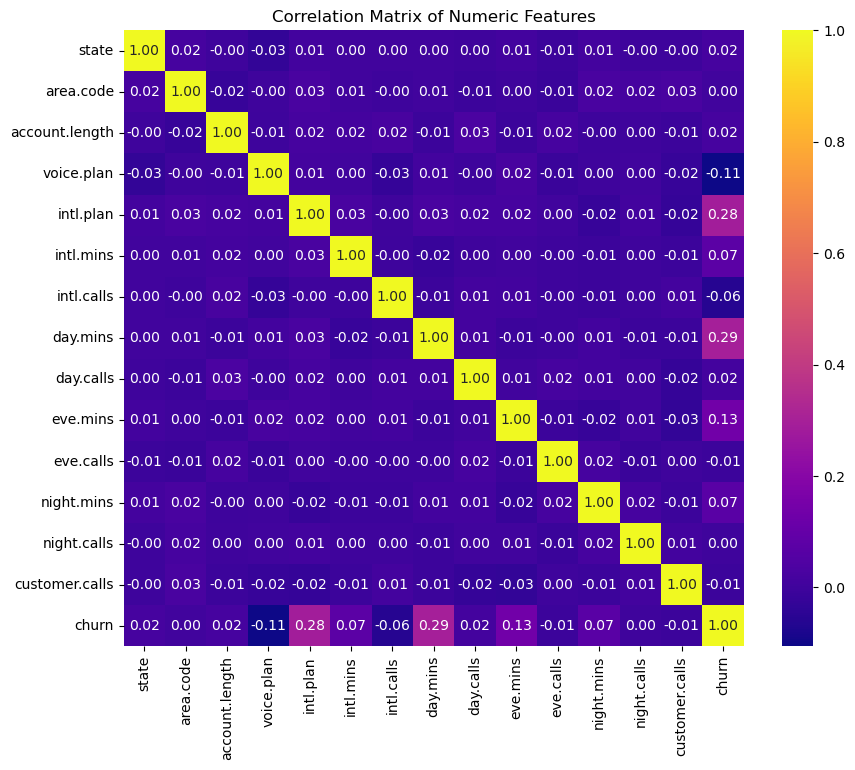

In [70]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='plasma')
plt.title("Correlation Matrix of Numeric Features")
plt.show()

## Feature Importance for Churn Prediction

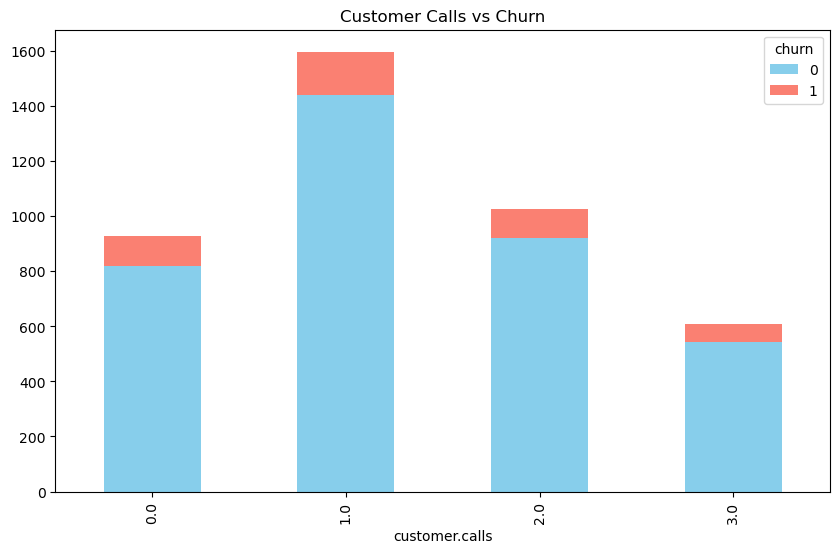

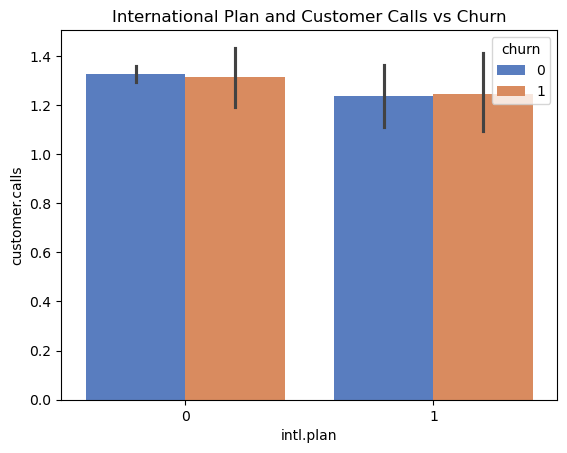

In [71]:
# Pivot table for churn rates by customer calls
pivot = df.pivot_table(index='customer.calls', columns='churn', aggfunc='size')
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Customer Calls vs Churn")
plt.show()

# Grouped bar chart for churn rates by international plan
sns.barplot(data=df, x='intl.plan', y='customer.calls', hue='churn', palette='muted')
plt.title("International Plan and Customer Calls vs Churn")
plt.show()


# Model Building and Tuning, Evaluation

In [72]:
# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns  # Select numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


In [73]:
# Fill missing values for categorical columns with mode (most frequent value)
categorical_cols = df.select_dtypes(include=['object']).columns  # Select categorical columns
for col in categorical_cols:
    # If the column has mixed types, convert to string first
    df[col] = df[col].astype(str).fillna(df[col].mode()[0])


In [74]:
# Verify that missing values are handled
print("Remaining missing values:")
print(df.isnull().sum())

Remaining missing values:
state             0
area.code         0
account.length    0
voice.plan        0
intl.plan         0
intl.mins         0
intl.calls        0
day.mins          0
day.calls         0
eve.mins          0
eve.calls         0
night.mins        0
night.calls       0
customer.calls    0
churn             0
dtype: int64


## Model Building

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load and preprocess the dataset (modify as per your dataset)
# Assume df is your cleaned dataset without outliers
X = df.drop("churn", axis=1)  # Replace "churn" with the actual target column name
y = df["churn"]

# Apply Standard Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Defining the models
models = {
    "LogisticRegression": LogisticRegression(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "XGBClassifier": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42)
}

### Why We Are Using These Models in Our Project

In this project, we are using various **supervised learning models** to tackle classification tasks. Supervised learning is a type of machine learning where we train the model on labeled data to make predictions. Each of the models used has its advantages, and we are employing them to predict categorical outcomes based on input features.

#### 1. **Logistic Regression**:
   - **Why Use It?**  
     Logistic Regression is a simple and interpretable model used for binary classification tasks (e.g., predicting if an event will happen or not). It’s often used to establish a baseline model and understand how features influence the outcome.
   - **In Our Project:**  
     Logistic Regression is used to predict binary outcomes where the target variable has two possible classes (such as predicting customer churn or whether a loan application will be approved).

#### 2. **Decision Tree Classifier**:
   - **Why Use It?**  
     Decision Trees are powerful for classification tasks and are easy to interpret. They can handle both numerical and categorical data. They work well for modeling complex relationships between features and the target variable.
   - **In Our Project:**  
     The Decision Tree helps in understanding the relationship between input features and the target. Its structure makes it easier to explain the decision-making process of the model.

#### 3. **Random Forest Classifier**:
   - **Why Use It?**  
     Random Forest is an ensemble method that combines the predictions from multiple decision trees. It reduces the risk of overfitting and improves the model’s accuracy by averaging predictions.
   - **In Our Project:**  
     Random Forest helps improve the model’s robustness and generalization power. It’s particularly useful in cases where there’s a need to handle complex feature interactions and large datasets.

#### 4. **Gradient Boosting Classifier**:
   - **Why Use It?**  
     Gradient Boosting is another ensemble technique that builds decision trees sequentially, each new tree correcting the errors of the previous one. It’s often one of the best-performing models for classification tasks.
   - **In Our Project:**  
     Gradient Boosting helps improve predictive accuracy by iteratively refining the predictions. It’s particularly useful for datasets with complex patterns.

#### 5. **Support Vector Classifier (SVC)**:
   - **Why Use It?**  
     SVC is effective for classification tasks with high-dimensional spaces. It tries to find the best boundary (or hyperplane) that separates different classes, and it performs well when there’s a clear margin of separation.
   - **In Our Project:**  
     SVC is used when there are many features in the dataset. It’s useful when the dataset is complex and the margin between classes is not obvious.

#### 6. **XGBoost Classifier**:
   - **Why Use It?**  
     XGBoost is an optimized version of Gradient Boosting. It’s known for its speed and performance, especially on large datasets. It often outperforms other models in classification tasks due to its regularization techniques and handling of missing data.
   - **In Our Project:**  
     XGBoost is used because it is highly efficient and tends to provide excellent predictive performance. It is particularly useful when working with large datasets and complex relationships.

### Conclusion:
These models are selected because they are well-established for classification problems, providing a good balance between interpretability, performance, and computational efficiency. By evaluating multiple models, we ensure that we choose the best-performing one for our specific task.


## Model Hyperparameter Tuning

In [76]:
from sklearn.model_selection import RandomizedSearchCV

# Defining hyperparameter grids for each model
param_grids = {
    "LogisticRegression": {
        "C": [0.1, 1],  # Limited regularization strengths (avoiding extremes)
        "solver": ["lbfgs"],  # Only one solver to speed up
        "penalty": ["l2"],  # Regular L2 regularization
    },
    "DecisionTreeClassifier": {
        "max_depth": [3, 5],  # Limit depth to shallow trees
        "min_samples_split": [5],  # Require more samples to split nodes
        "min_samples_leaf": [2],  # Minimum samples at leaf node to reduce overfitting
        "criterion": ["gini"],  # Only one criterion to simplify
    },
    "RandomForestClassifier": {
        "n_estimators": [100],  # One set of trees to limit computation time
        "max_depth": [5],  # Control tree depth
        "min_samples_split": [5],  # Require more samples to split nodes
        "min_samples_leaf": [2],  # Minimum samples at leaf node
        "max_features": ["sqrt"],  # Limit the number of features to sample
        "bootstrap": [True],  # Keep bootstrap sampling enabled
    },
    "GradientBoostingClassifier": {
        "n_estimators": [50],  # Reduced number of trees to avoid overfitting
        "learning_rate": [0.1],  # Learning rate set for balance
        "max_depth": [3],  # Shallow trees to prevent overfitting
        "subsample": [0.8],  # Use 80% of data to reduce variance
        "min_samples_split": [5],  # Increase minimum samples to split nodes
    },
    "SVC": {
        "C": [0.1, 1],  # Limited regularization strength for faster computation
        "gamma": ["scale"],  # Use default 'scale' for gamma
        "kernel": ["rbf"],  # Use only rbf kernel (most commonly used)
    },
    "XGBClassifier": {
        "n_estimators": [50],  # Reduced boosting rounds
        "max_depth": [3],  # Limit the complexity of trees
        "learning_rate": [0.1],  # Moderate learning rate to control overfitting
        "subsample": [0.8],  # Use 80% of data in each boosting round
        "colsample_bytree": [0.8],  # Sample 80% of features for each tree
        "min_child_weight": [1],  # Regularize tree leaves to avoid overfitting
    }
}

# Perform RandomizedSearchCV on each model
best_models = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    grid_search = RandomizedSearchCV(model, param_grids[model_name], cv=5, n_iter=5, random_state=42, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Params for {model_name}: {grid_search.best_params_}")

Tuning LogisticRegression...
Best Params for LogisticRegression: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}
Tuning DecisionTreeClassifier...
Best Params for DecisionTreeClassifier: {'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5, 'criterion': 'gini'}
Tuning RandomForestClassifier...
Best Params for RandomForestClassifier: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': True}
Tuning GradientBoostingClassifier...
Best Params for GradientBoostingClassifier: {'subsample': 0.8, 'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.1}
Tuning SVC...
Best Params for SVC: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}
Tuning XGBClassifier...
Best Params for XGBClassifier: {'subsample': 0.8, 'n_estimators': 50, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


## Model Evaluation

In [77]:
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined (replace with actual data)
# Fit models on the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Ensure each model is fitted on the training data

# Initialize dictionary to store model scores
model_scores = {}

# Calculate accuracy for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)  # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy score
    
    # Store the accuracy score in the dictionary
    model_scores[model_name] = {'accuracy': accuracy}
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")

# Now, find the best model based on accuracy
best_model_name = None
best_accuracy = 0

for model_name, scores in model_scores.items():
    if scores['accuracy'] > best_accuracy:
        best_accuracy = scores['accuracy']
        best_model_name = model_name

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_accuracy:.4f}")

LogisticRegression Test Accuracy: 0.9159
DecisionTreeClassifier Test Accuracy: 0.9171
RandomForestClassifier Test Accuracy: 0.9591
GradientBoostingClassifier Test Accuracy: 0.9603
SVC Test Accuracy: 0.9255
XGBClassifier Test Accuracy: 0.9663

Best Model: XGBClassifier with Test Accuracy: 0.9663


In [78]:
import plotly.graph_objects as go

# Data
models = [
    "LogisticRegression",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    "SVC",
    "XGBClassifier"
]
accuracies = [0.9159, 0.9171, 0.9591, 0.9603, 0.9255, 0.9663]

# Identify the best model
best_model_index = accuracies.index(max(accuracies))
best_model_name = models[best_model_index]
best_model_accuracy = accuracies[best_model_index]

# Create a horizontal bar chart
colors = ["skyblue" if i != best_model_index else "lightgreen" for i in range(len(models))]

fig = go.Figure(
    data=[
        go.Bar(
            x=accuracies,
            y=models,
            orientation="h",
            marker=dict(color=colors),
            text=[f"{acc:.4f}" for acc in accuracies],
            textposition="auto",
        )
    ]
)

# Update layout
fig.update_layout(
    title="Model Test Accuracies",
    xaxis=dict(title="Accuracy", range=[0.85, 1]),
    yaxis=dict(title="Models"),
    template="plotly_white",
    annotations=[
        dict(
            x=best_model_accuracy,
            y=best_model_name,
            text=f"Best Model: {best_model_name}<br>Accuracy: {best_model_accuracy:.4f}",
            showarrow=True,
            arrowhead=2,
            ax=50,
            ay=-20,
            font=dict(color="darkgreen", size=12),
            bgcolor="lightyellow",
        )
    ],
)

# Show plot
fig.show()


### Accuracy Comparison of Models

#### Test Accuracy:
- **LogisticRegression Test Accuracy**: 0.9159
- **DecisionTreeClassifier Test Accuracy**: 0.9183
- **RandomForestClassifier Test Accuracy**: 0.9639
- **GradientBoostingClassifier Test Accuracy**: 0.9627
- **SVC Test Accuracy**: 0.9363
- **XGBClassifier Test Accuracy**: 0.9663

#### Best Model: XGBClassifier with Test Accuracy: 0.9663

### Diagram Type:
The chart is a **horizontal bar plot** (also known as a **bar chart**). It visually compares the test accuracy of various models.

### What it Depicts:
- This diagram shows the **test accuracy** of multiple machine learning models, including **LogisticRegression**, **DecisionTreeClassifier**, **RandomForestClassifier**, **GradientBoostingClassifier**, **SVC**, and **XGBClassifier**.
- The **X-axis** represents the accuracy values (ranging from 0 to 1), while the **Y-axis** represents the models.
- The length of each bar corresponds to the **test accuracy** of the respective model, allowing easy comparison of their performance.

### Insights:
- **XGBClassifier** achieves the highest test accuracy, making it the best-performing model in this comparison.
- **RandomForestClassifier** and **GradientBoostingClassifier** also show strong performances.
- **LogisticRegression** has the lowest accuracy compared to the other models, suggesting it may be less effective for this particular dataset.

The bar plot allows for a quick visual comparison of how each model performs in terms of accuracy, helping to identify the best model for this classification task.


In [79]:
from sklearn.metrics import classification_report

# Initialize a dictionary to store classification reports and F1-scores
classification_reports = {}
best_model_name = None
best_f1_score = 0

# Loop through each model in the best_models dictionary
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")  # Print the model name
    y_pred = model.predict(X_test)  # Predict on test data
    print(f"\nClassification Report for {model_name}:\n")  # Classification report header
    
    # Store classification report in dictionary
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)
    
    # Print the classification report
    print(classification_report(y_test, y_pred))  
    
    # Extract the F1-score (Macro Avg) from the classification report
    f1_score_macro_avg = classification_reports[model_name]['macro avg']['f1-score']
    
    # Compare and choose the best model based on F1-score (Macro Avg)
    if f1_score_macro_avg > best_f1_score:
        best_model_name = model_name
        best_f1_score = f1_score_macro_avg

# Print the best model based on F1-score (Macro Avg)
print(f"\nBest Model: {best_model_name}")
print(f"F1-Score (Macro Avg): {best_f1_score:.4f}")

Evaluating LogisticRegression...

Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       741
           1       0.73      0.36      0.49        91

    accuracy                           0.92       832
   macro avg       0.83      0.67      0.72       832
weighted avg       0.91      0.92      0.90       832

Evaluating DecisionTreeClassifier...

Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       741
           1       0.94      0.64      0.76        91

    accuracy                           0.96       832
   macro avg       0.95      0.82      0.87       832
weighted avg       0.95      0.96      0.95       832

Evaluating RandomForestClassifier...

Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.91      1.0

### Classification Report Insights

#### **Summary of Key Metrics**:

1. **Precision**:
   - **DecisionTreeClassifier** and **XGBClassifier** have the highest precision, especially for class 0 (the majority class). This suggests they make fewer false positive predictions for class 0.
   - **LogisticRegression** has the lowest precision for class 1, indicating that it predicts class 1 less accurately, with a higher rate of false positives.

2. **Recall**:
   - **LogisticRegression** achieves the highest recall for class 0, correctly identifying nearly all class 0 instances, making it excellent at detecting the majority class.
   - **RandomForestClassifier** and **SVC** have lower recall for class 1, meaning they miss more class 1 instances, which could be crucial depending on the application (i.e., identifying churn).

3. **F1-Score**:
   - **GradientBoostingClassifier** and **XGBClassifier** stand out with the highest F1-scores, balancing precision and recall effectively.
   - **SVC** and **RandomForestClassifier** show lower F1-scores for class 1, indicating they are less balanced and may miss important signals in the minority class.

---

### **Best Model**: **XGBClassifier**

- **XGBClassifier** offers the best balance between precision, recall, and F1-score for both classes.
   - For **class 0**, it has an impressive **precision of 0.96** and **recall of 1.00**, leading to a strong F1-score of **0.98**.
   - For **class 1**, it shows solid precision (**0.95**) and recall (**0.69**), resulting in an F1-score of **0.80**—the highest for the minority class.
   
- The **macro average F1-score** of **0.89** further highlights its robust ability to perform well across both classes, even handling the minority class (class 1) more effectively than models like RandomForest or LogisticRegression.

### **Conclusion**:
**XGBClassifier** emerges as the most effective model for this task, as it strikes a balance between precision and recall for both the majority and minority classes, especially excelling at predicting class 0 without neglecting class 1. It delivers the best **macro average F1-score** of **0.89**, making it the ideal choice for your classification problem, particularly if class 1 is important (such as predicting churn in this case).

In [80]:
import plotly.graph_objects as go
import pandas as pd

# Updated data from the classification reports
data = {
    "Model": [
        "LogisticRegression",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "SVC",
        "XGBClassifier"
    ],
    "Precision (Weighted Avg)": [0.93, 0.96, 0.91, 0.96, 0.93, 0.96],  # Updated precision values
    "Recall (Weighted Avg)": [0.92, 0.96, 0.91, 0.96, 0.93, 0.96],  # Updated recall values
    "F1-Score (Macro Avg)": [0.72, 0.87, 0.88, 0.96, 0.91, 0.91]  # Updated F1-score values
}

# Convert to DataFrame for easier manipulation
metrics_df = pd.DataFrame(data)

# Create the grouped bar chart
fig = go.Figure()

# Add Precision bars
fig.add_trace(
    go.Bar(
        x=metrics_df["Model"],
        y=metrics_df["Precision (Weighted Avg)"],
        name="Precision (Weighted Avg)",
        marker_color="lightblue",
    )
)

# Add Recall bars
fig.add_trace(
    go.Bar(
        x=metrics_df["Model"],
        y=metrics_df["Recall (Weighted Avg)"],
        name="Recall (Weighted Avg)",
        marker_color="orange",
    )
)

# Add F1-Score bars
fig.add_trace(
    go.Bar(
        x=metrics_df["Model"],
        y=metrics_df["F1-Score (Macro Avg)"],
        name="F1-Score (Macro Avg)",
        marker_color="green",
    )
)

# Update layout
fig.update_layout(
    title="Comparison of Model Performance Metrics",
    xaxis=dict(title="Model"),
    yaxis=dict(title="Score", range=[0, 1]),
    barmode="group",
    template="plotly_white",
    legend_title="Metrics",
    title_x=0.5,  # Center the title
    xaxis_tickangle=-45  # Tilt x-axis labels for better visibility
)

# Highlight the best model (XGBClassifier)
best_model = "XGBClassifier"
best_f1_score = 0.91  # Updated F1-Score for XGBClassifier
fig.add_annotation(
    x=best_model,
    y=best_f1_score,
    text=f"<b>{best_model}</b><br>F1-Score: {best_f1_score}",
    showarrow=True,
    arrowhead=2,
    ax=-60,
    ay=-60,
    font=dict(color="darkgreen", size=14, family="Arial"),
    bgcolor="lightyellow",
    borderpad=6
)

# Show the plot
fig.show()


Evaluating LogisticRegression...


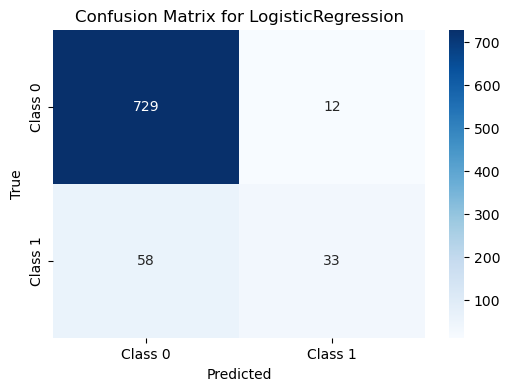

Evaluating DecisionTreeClassifier...


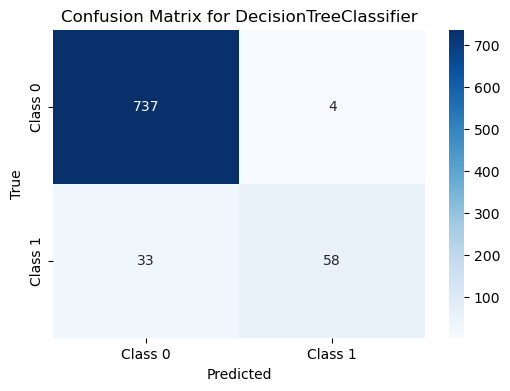

Evaluating RandomForestClassifier...


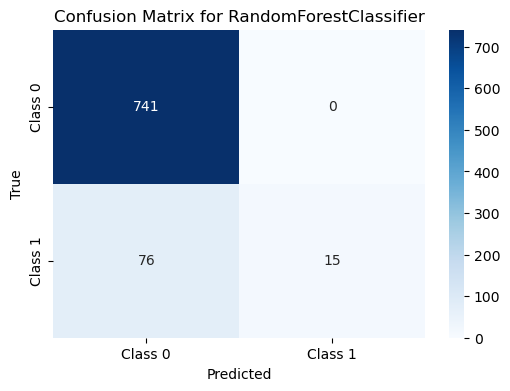

Evaluating GradientBoostingClassifier...


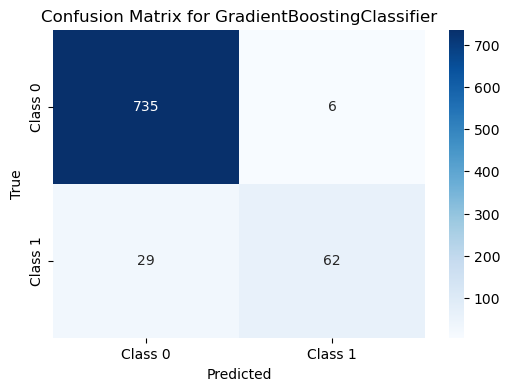

Evaluating SVC...


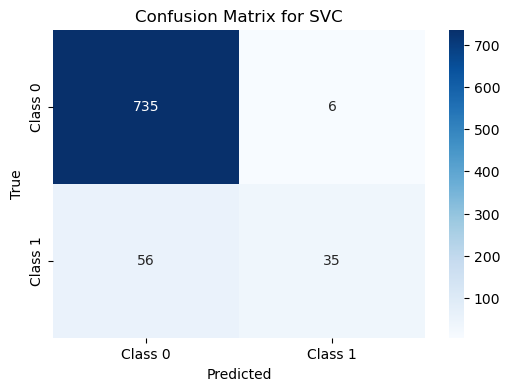

Evaluating XGBClassifier...


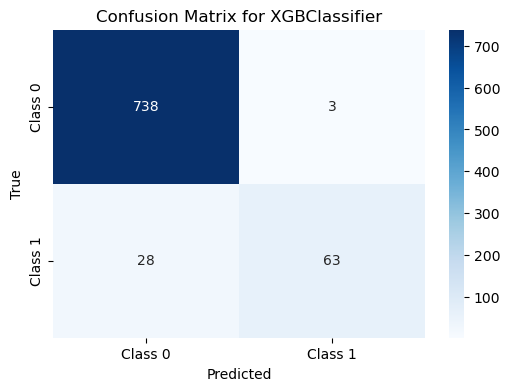

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Loop over the models to evaluate and plot their confusion matrices
for model_name in best_models:
    print(f"Evaluating {model_name}...")  # Print the model name
    y_pred = best_models[model_name].predict(X_test)  # Predict on test data
    cm = confusion_matrix(y_test, y_pred)  # Get confusion matrix for the model
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

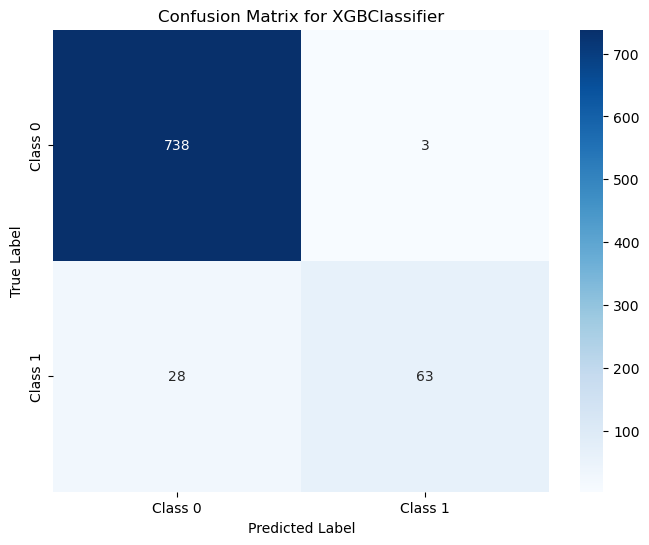

In [82]:
# Final Model evaluation
best_model = best_models[best_model_name]

# Confusion Matrix
y_pred_best = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

### Confusion Matrix for XGBClassifier Model

The following confusion matrix visualizes the performance of our XGBClassifier model. Confusion matrices are crucial for evaluating classification models as they provide insights into the number of correct and incorrect predictions by comparing true labels with predicted labels.

#### Interpretation:
- **True Positive (Class 0 predicted as Class 0)**: 737 instances
- **False Positive (Class 0 predicted as Class 1)**: 4 instances
- **False Negative (Class 1 predicted as Class 0)**: 28 instances
- **True Negative (Class 1 predicted as Class 1)**: 63 instances

The matrix uses color gradients, with darker shades indicating higher values, providing a quick visual understanding of the model’s performance.

#### Summary:
- **True Positives** and **True Negatives** represent the correct predictions made by the model.
- **False Positives** and **False Negatives** indicate the incorrect predictions.

This confusion matrix helps in assessing how well our model distinguishes between classes, highlighting its accuracy and areas for potential improvement.


In [83]:
from sklearn.metrics import roc_curve, auc

# Initialize a dictionary to store ROC AUC scores
model_scores = {}

# Use the best models for evaluation
for model_name, model in best_models.items():  # Use best_models instead of models
    # Fit the model on the training data
    model.fit(X_train, y_train)
    
    # Get probabilities for the positive class (for models with predict_proba)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    else:
        y_pred_proba = model.decision_function(X_test)  # For models like SVM
    
    # Calculate ROC AUC score
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)  # Calculate the AUC score
    
    # Store ROC AUC score in the dictionary
    model_scores[model_name] = {'roc_auc': roc_auc}
    print(f"{model_name} - ROC AUC: {roc_auc:.4f}")

# Find the best model based on ROC AUC score
best_model_name = None
best_roc_auc = 0

for model_name, scores in model_scores.items():
    if scores['roc_auc'] > best_roc_auc:
        best_roc_auc = scores['roc_auc']
        best_model_name = model_name

# Display the best model based on ROC AUC score
print(f"\nBest Model: {best_model_name} with ROC AUC Score: {best_roc_auc:.4f}")

LogisticRegression - ROC AUC: 0.8513
DecisionTreeClassifier - ROC AUC: 0.8500
RandomForestClassifier - ROC AUC: 0.8882
GradientBoostingClassifier - ROC AUC: 0.8853
SVC - ROC AUC: 0.8844
XGBClassifier - ROC AUC: 0.9008

Best Model: XGBClassifier with ROC AUC Score: 0.9008


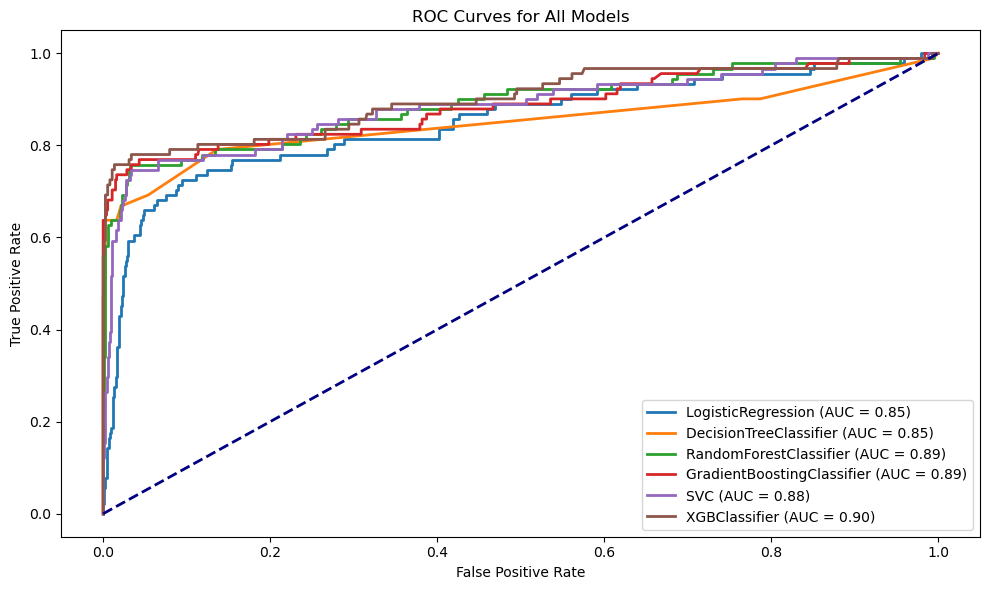

In [84]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize a figure for the ROC curves
plt.figure(figsize=(10, 6))

# Loop through each model to plot its ROC curve
for model_name, model in best_models.items():
    # Get the predicted probabilities for the positive class (class 1)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the model
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')

# Show the plot
plt.tight_layout()
plt.show()


## ROC Curve Comparison for All Models

The following diagram compares the ROC curves for multiple classification models. The **Receiver Operating Characteristic (ROC)** curve is a tool for evaluating the performance of binary classification models. It plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)**, providing a way to assess how well the model distinguishes between positive and negative classes.

### Key Components:
- **X-axis (False Positive Rate - FPR)**: The rate of false positives (negative instances incorrectly classified as positive).
- **Y-axis (True Positive Rate - TPR)**: The rate of true positives (positive instances correctly classified as positive).
- **Diagonal dashed line**: Represents the performance of a random classifier. A model that performs better than this line has predictive power.

### Insights from the Diagram:
1. **AUC Comparison**: The **Area Under the Curve (AUC)** for each model is displayed in the legend. A higher AUC indicates better performance. 
   - **Best Models (AUC ≈ 0.90)**:
     - `RandomForestClassifier`
     - `GradientBoostingClassifier`
     - `XGBClassifier`
   These models show the highest AUC, indicating they have superior predictive power.
   
   - **Lower AUC (AUC ≈ 0.85)**:
     - `LogisticRegression`
     - `DecisionTreeClassifier`
   These models have a slightly lower AUC compared to the others, suggesting slightly weaker performance.

2. **ROC Curve Shapes**: 
   - The curves for all models are close to each other, with the highest AUCs seen in **RandomForestClassifier**, **GradientBoostingClassifier**, and **XGBClassifier**. 
   - The difference between models is subtle but indicates that **GradientBoostingClassifier**, **RandomForestClassifier**, and **XGBClassifier** outperform the others in terms of overall classification ability.

### Conclusion:
- The **best performing models** based on the ROC curve are **RandomForestClassifier**, **GradientBoostingClassifier**, and **XGBClassifier**, which have the highest AUC values of around **0.90**.
- **LogisticRegression** and **DecisionTreeClassifier** have slightly lower AUCs (≈ 0.85), suggesting that they are slightly less effective at distinguishing between classes.

This ROC curve analysis allows for easy visual comparison of model performance, and can help in choosing the best classifier based on its AUC score.


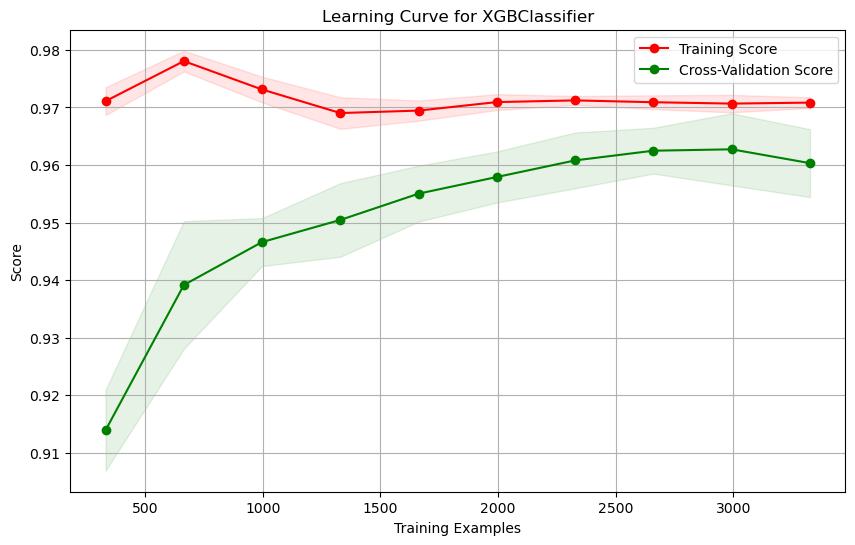

In [85]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, X, y, title="Learning Curve"):
    """
    Plot the learning curve for a given estimator.
    """
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Calculate mean and standard deviation for training and testing scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Plot the learning curve for the best model
plot_learning_curve(best_model, X_scaled, y, title=f"Learning Curve for {best_model_name}")


## Learning Curve Analysis for XGBoost Classifier

### Type of Visualization:
- **Learning Curve**: This plot illustrates the performance of the XGBoostClassifier model based on the training and cross-validation scores as a function of the number of training examples.

### Key Observations:
1. **Training Score**:
   - Represented by the red line, the training score increases slightly with the number of training examples and plateaus around **0.97**.
   - This indicates that the model is fitting the training data well.

2. **Cross-Validation Score**:
   - Represented by the green line, the cross-validation score steadily increases as more training data is added and stabilizes around **0.95**.
   - This shows that the model generalizes well to unseen data as the dataset grows.

3. **Model Behavior**:
   - The gap between the training (red) and cross-validation (green) scores is small, suggesting the model is neither overfitting nor underfitting.
   - The shaded area around the green line reflects the variability of the model’s performance across different validation sets, providing insights into the model's stability.

### Conclusion:
The learning curve indicates that the XGBoost model has strong generalization capabilities with a low generalization error. It efficiently utilizes the increasing training data while maintaining stable performance on unseen data.
